In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
!echo $CUDA_VISIBLE_DEVICES

1


In [2]:
import sys
sys.path.insert(0, "../")

import os
os.chdir("../")

In [3]:
problems = ["dw4", "lj13", "qm9"]
problem = problems[1]
if problem == "dw4":
    dim = 2
    n_nodes = 4
    from examples.dw4 import *
    import target.double_well as dw4
    target_log_prob_fn = dw4.log_prob_fn
elif problem == "lj13":
    dim = 3
    n_nodes = 13
    from examples.lj13 import *
    import target.leonard_jones as lj13
    target_log_prob_fn = lj13.log_prob_fn
else:
    dim = 3
    n_nodes = 19
    from examples.qm9 import *
    target_log_prob_fn = None

/scratch/lim24/augmented-equivariant-flows/examples/train.py:9: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
/scratch/lim24/augmented-equivariant-flows/examples/lj13.py:68: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path="./config", config_name="lj13.yaml")


In [4]:
import yaml
import jax
import matplotlib.pyplot as plt

In [5]:
USE_64_BIT = False
if USE_64_BIT:
    from jax.config import config
    config.update("jax_enable_x64", True)

In [6]:
cfg = DictConfig(yaml.safe_load(open(f"examples/config/{problem}.yaml")))
cfg

{'hydra': {'job': {'chdir': False}}, 'target': {'aux': {'global_centering': False, 'scale_init': 0.1, 'trainable_augmented_scale': False}}, 'flow': {'base': {'aux': {'global_centering': False, 'scale_init': '${target.aux.scale_init}', 'trainable_augmented_scale': True}}, 'dim': 3, 'n_aug': 3, 'nodes': 13, 'n_layers': 8, 'identity_init': True, 'type': 'proj', 'kwargs': {'proj': {'global_frame': False, 'process_flow_params_jointly': False, 'condition_on_x_proj': False, 'gram_schmidt': False, 'add_small_identity': False}}, 'act_norm': False, 'compile_n_unroll': 1, 'nets': {'type': 'egnn', 'mace': {'n_vec_residual_per_vec_in': 1, 'n_invariant_feat_residual': 64, 'n_vectors_hidden_readout_block': 16, 'n_invariant_hidden_readout_block': 64, 'hidden_irreps': '64x0e+32x1o+16x2e+8x3o', 'num_features': 1, 'num_species': 1, 'max_ell': 2, 'num_layers': 2, 'correlation': 3, 'interaction_mlp_depth': 3, 'interaction_mlp_width': 64, 'residual_mlp_width': 64, 'residual_mlp_depth': 1}, 'e3gnn': {'n_bloc

# Train

In [16]:
cfg.training.save = False
cfg.logger = DictConfig({"list_logger": None})
cfg.flow.act_norm = True

In [17]:
cfg.training.optimizer

{'init_lr': '1e-4', 'optimizer_name': 'adam', 'use_schedule': True, 'peak_lr': '6e-4', 'end_lr': '1e-4', 'warmup_n_epoch': 10, 'max_global_norm': 1.0}

In [18]:
cfg.training.n_epoch = 256

creating flow of type proj
training data position shape of (992, 13, 3), feature shape of (992, 13, 1)


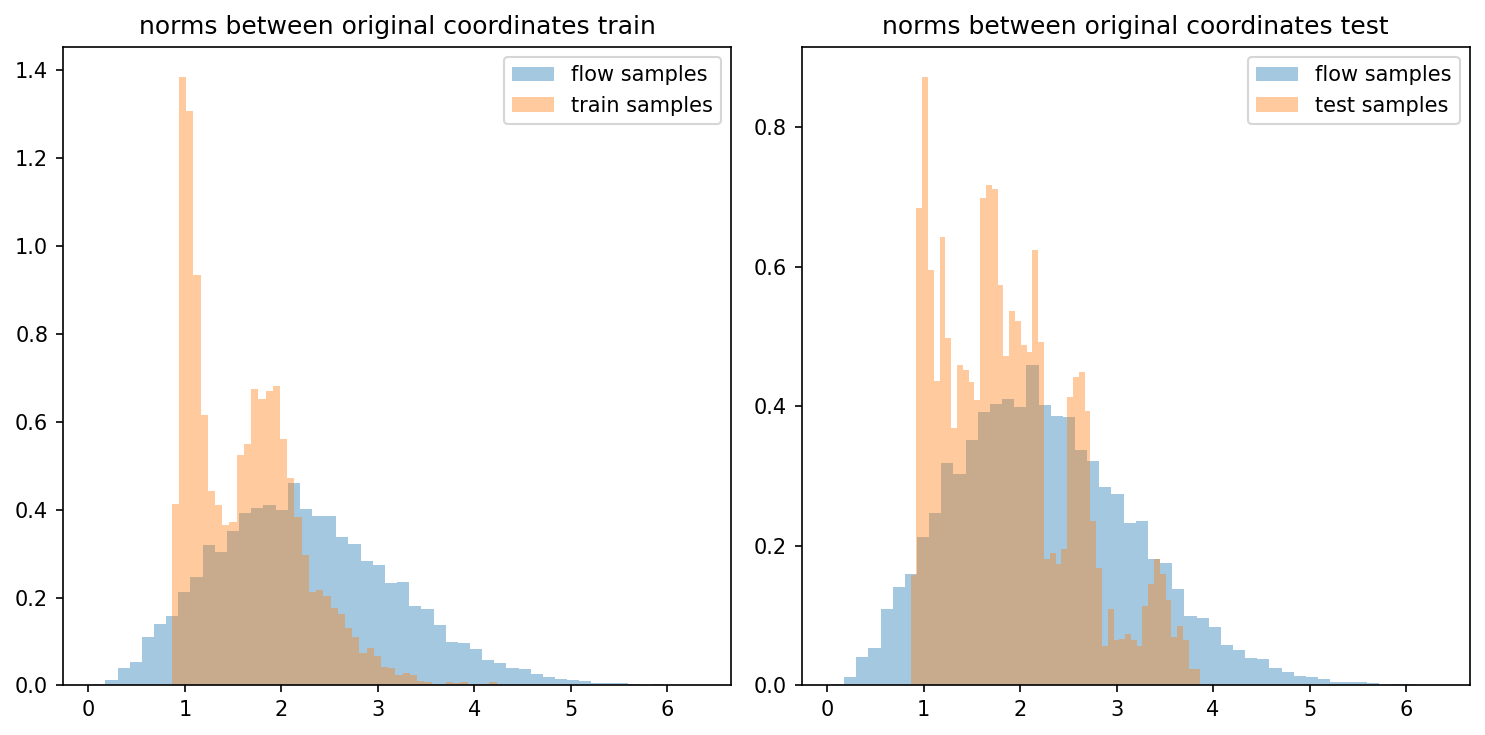

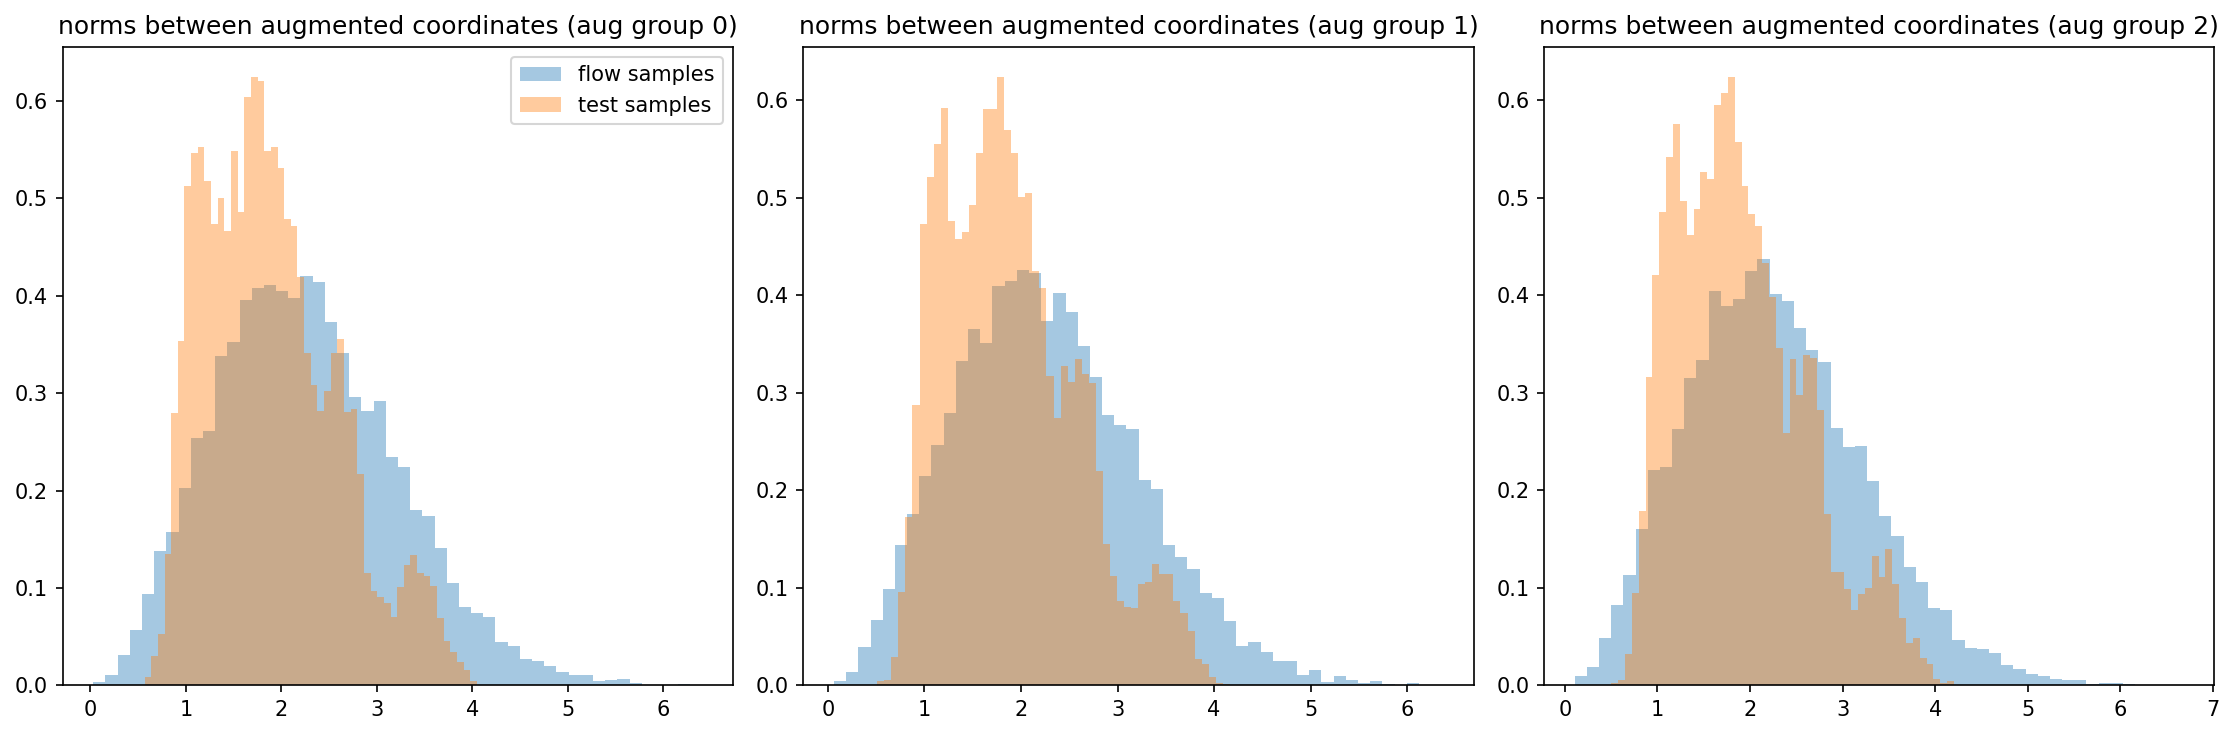

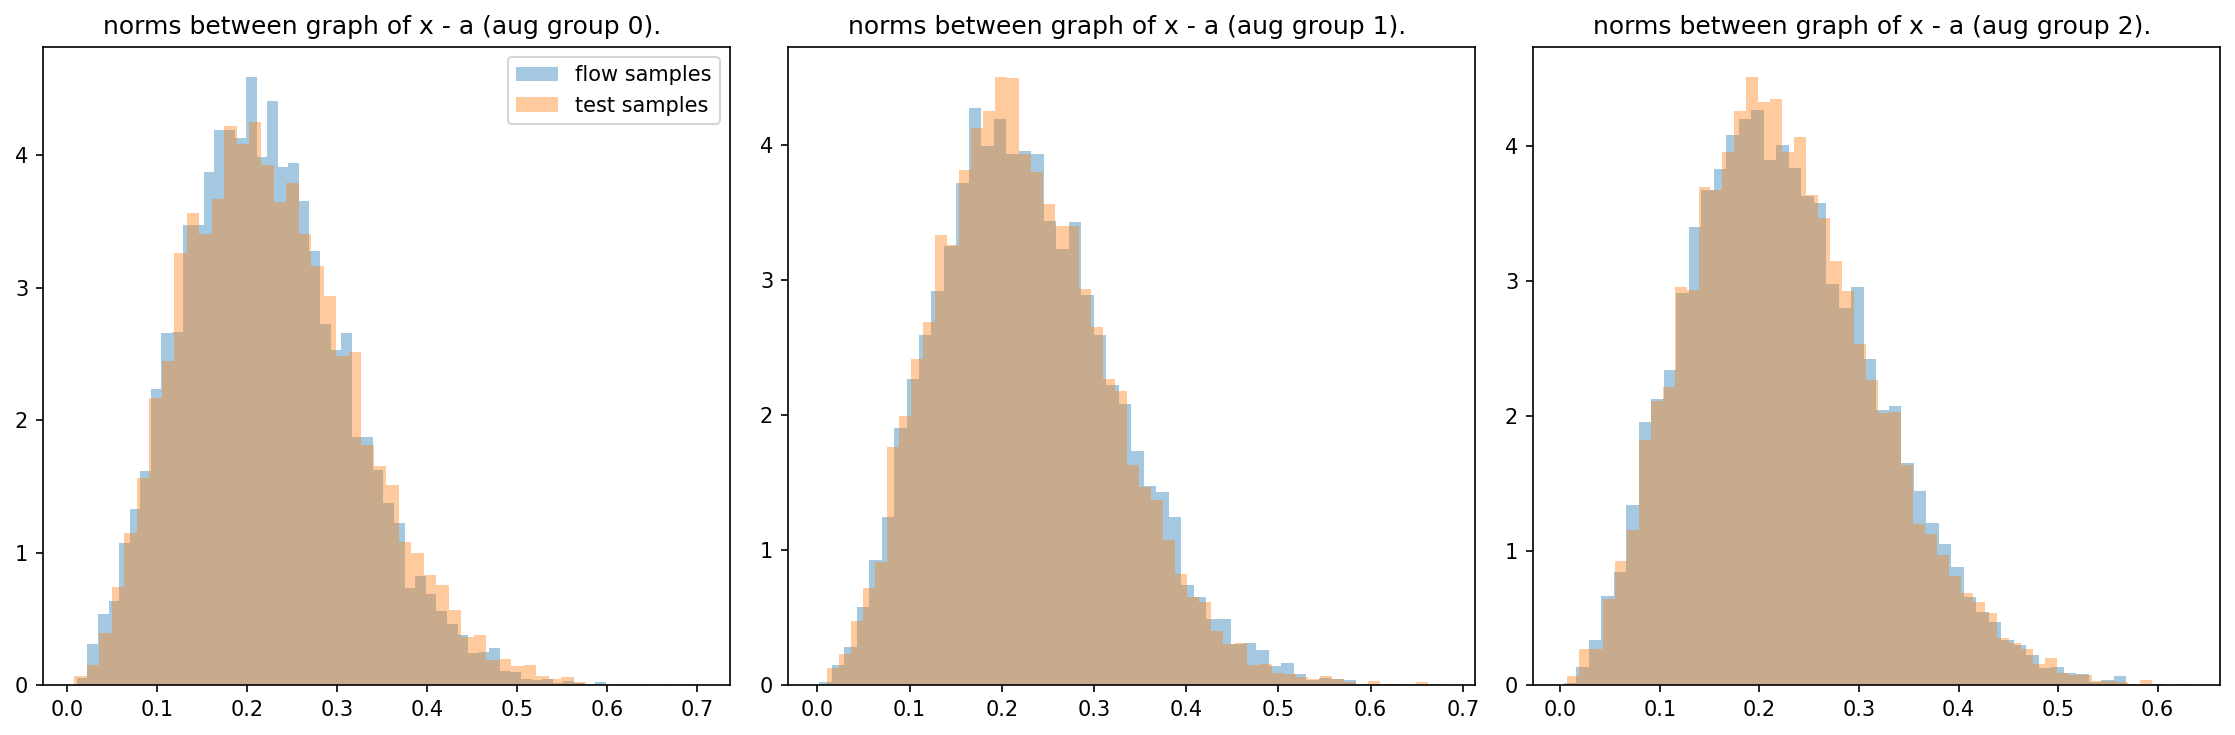

  0%|                                                   | 0/256 [00:00<?, ?it/s]

non numeric history values being saved


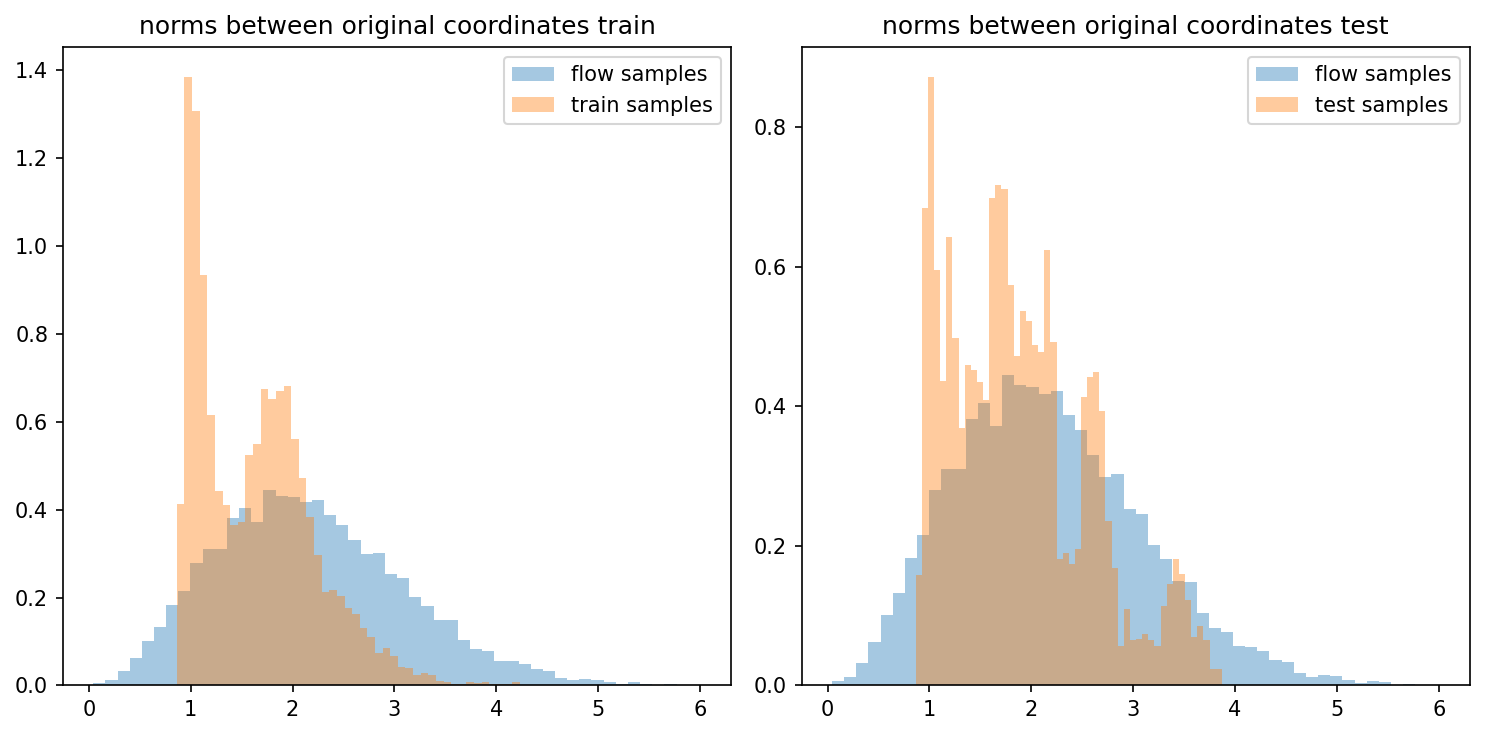

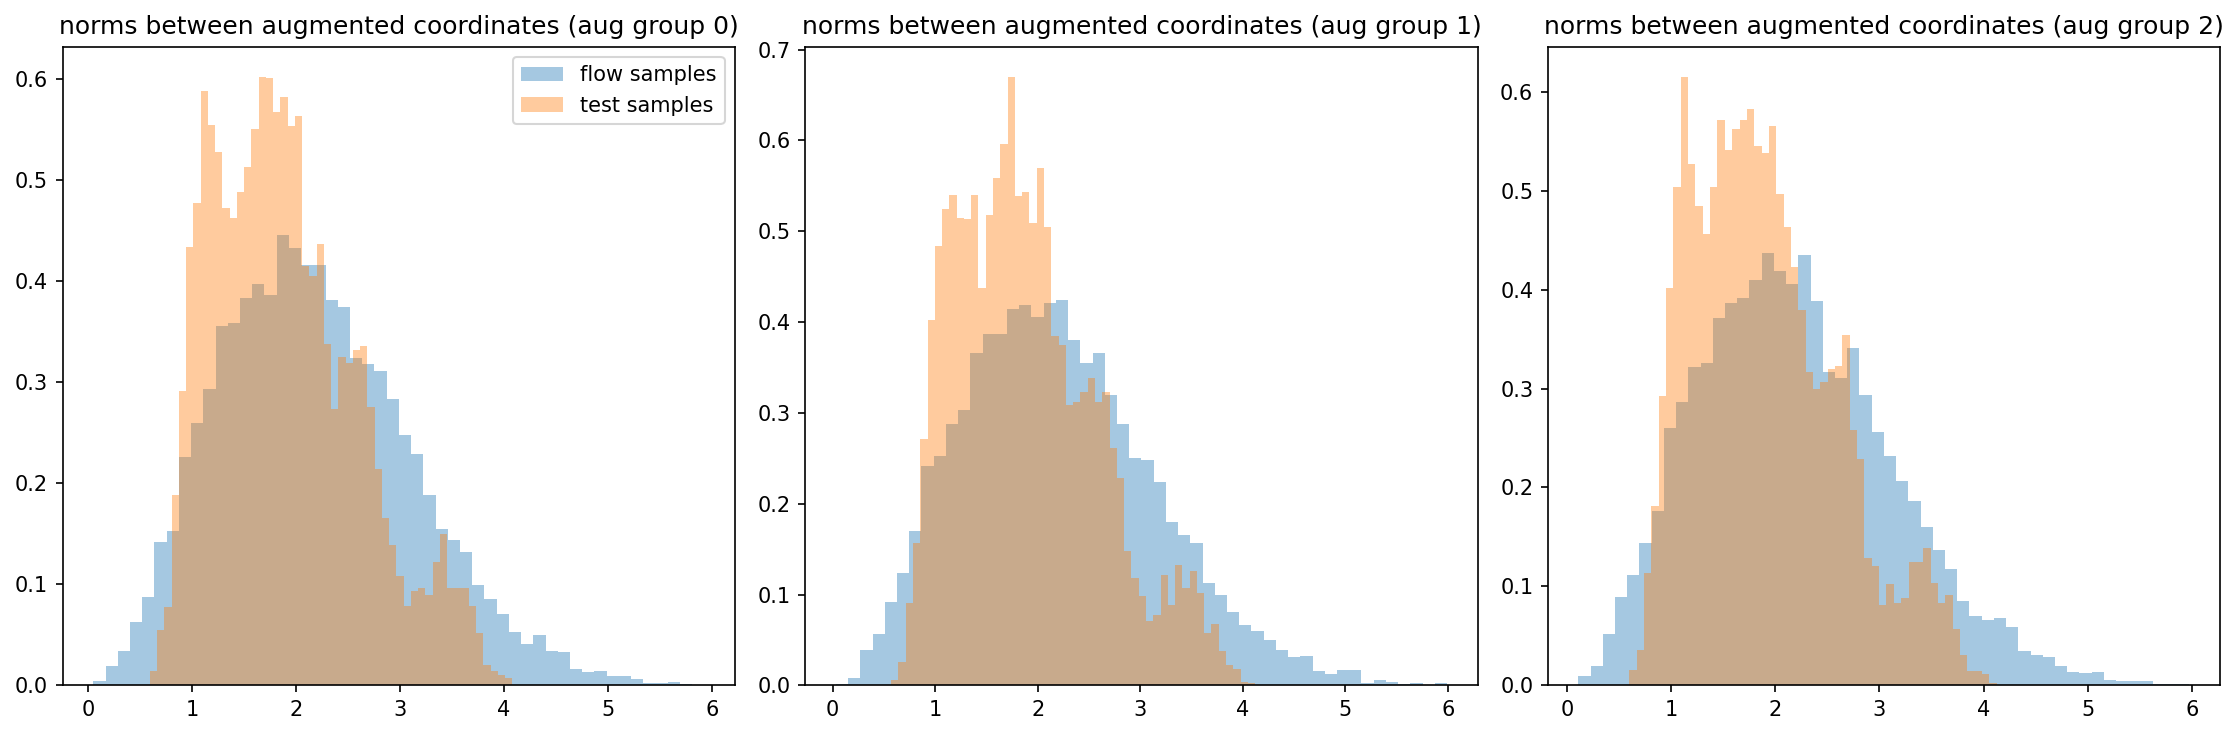

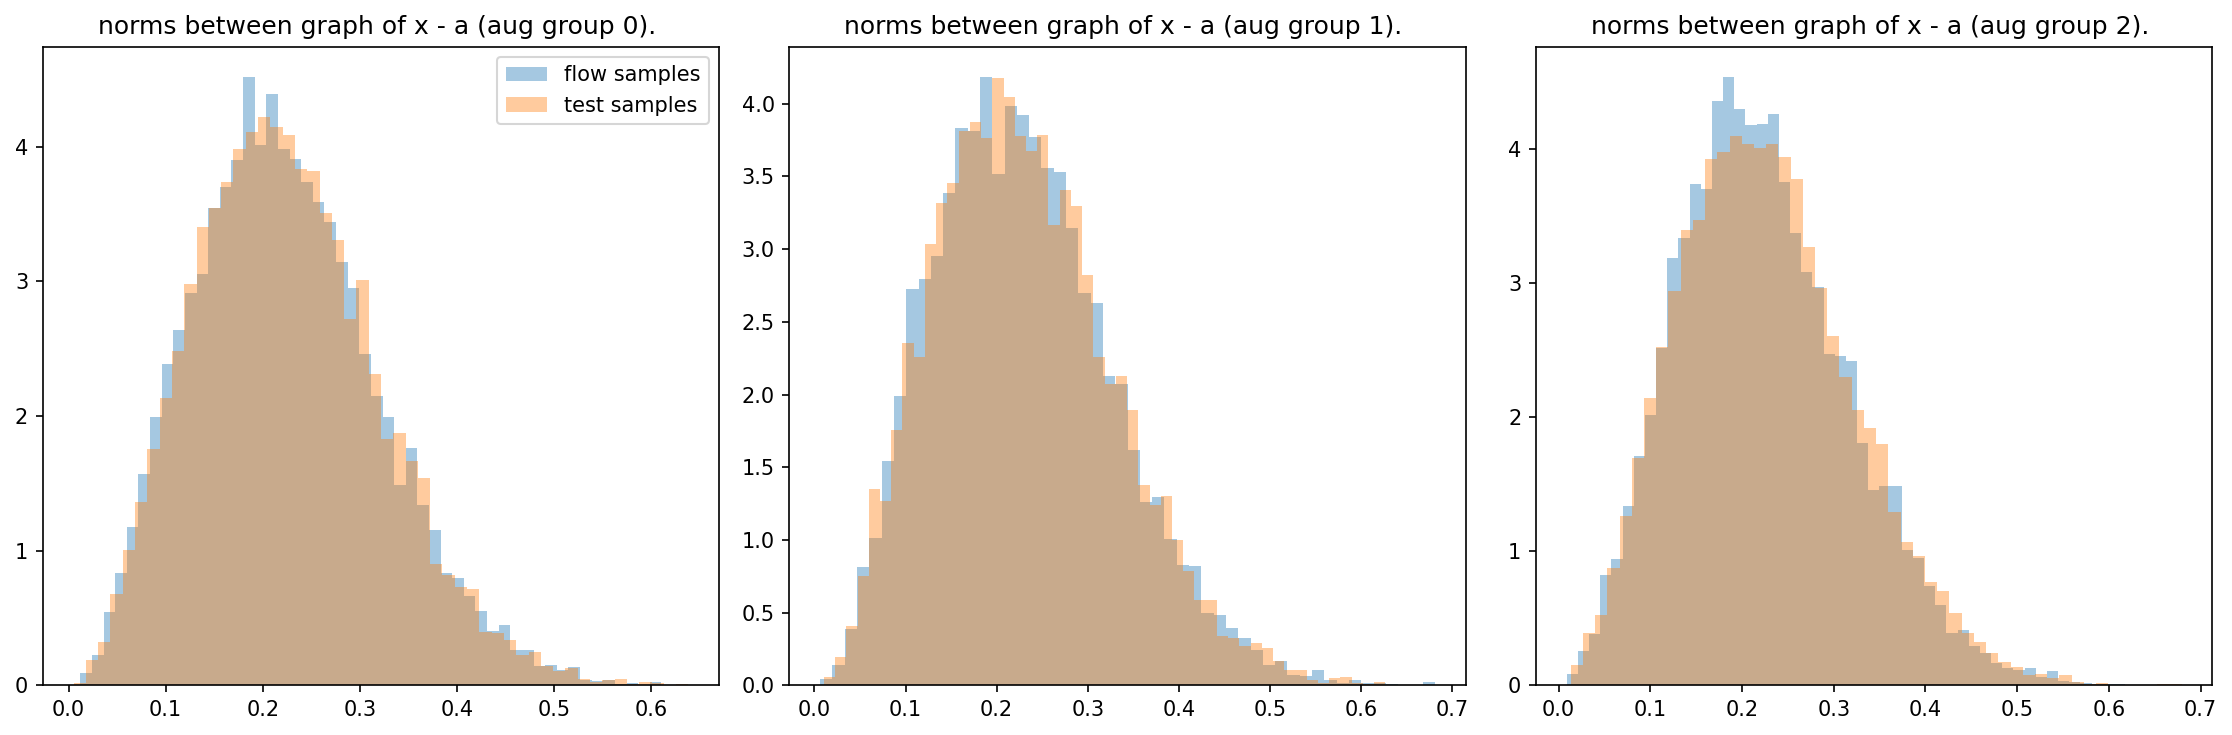

  0%|▏                                        | 1/256 [01:38<6:59:32, 98.72s/it]

{'ess_marginal': Array(0.7127218, dtype=float32), 'eval_log_lik': Array(59.494114, dtype=float32), 'marginal_log_lik': Array(-43.728554, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00114847, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(0.00016786, dtype=float32), 'var_log_w': Array(0.36623386, dtype=float32)}


 11%|████▊                                     | 29/256 [02:32<13:12,  3.49s/it]

{'ess_marginal': Array(0.14184408, dtype=float32), 'eval_log_lik': Array(65.03455, dtype=float32), 'marginal_log_lik': Array(-35.042152, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00015505, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(4.471502e-05, dtype=float32), 'var_log_w': Array(9.276471, dtype=float32)}


 14%|█████▉                                    | 36/256 [02:43<06:46,  1.85s/it]

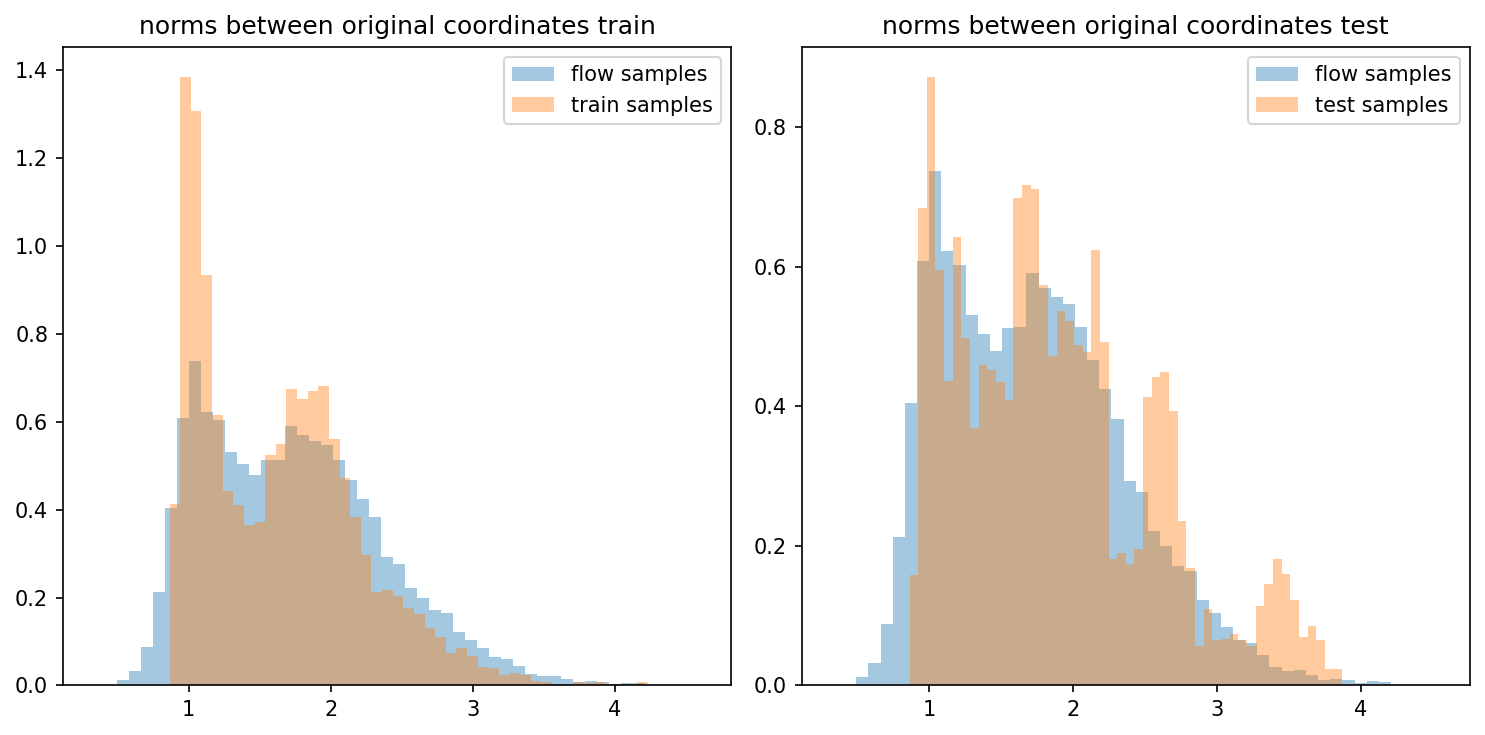

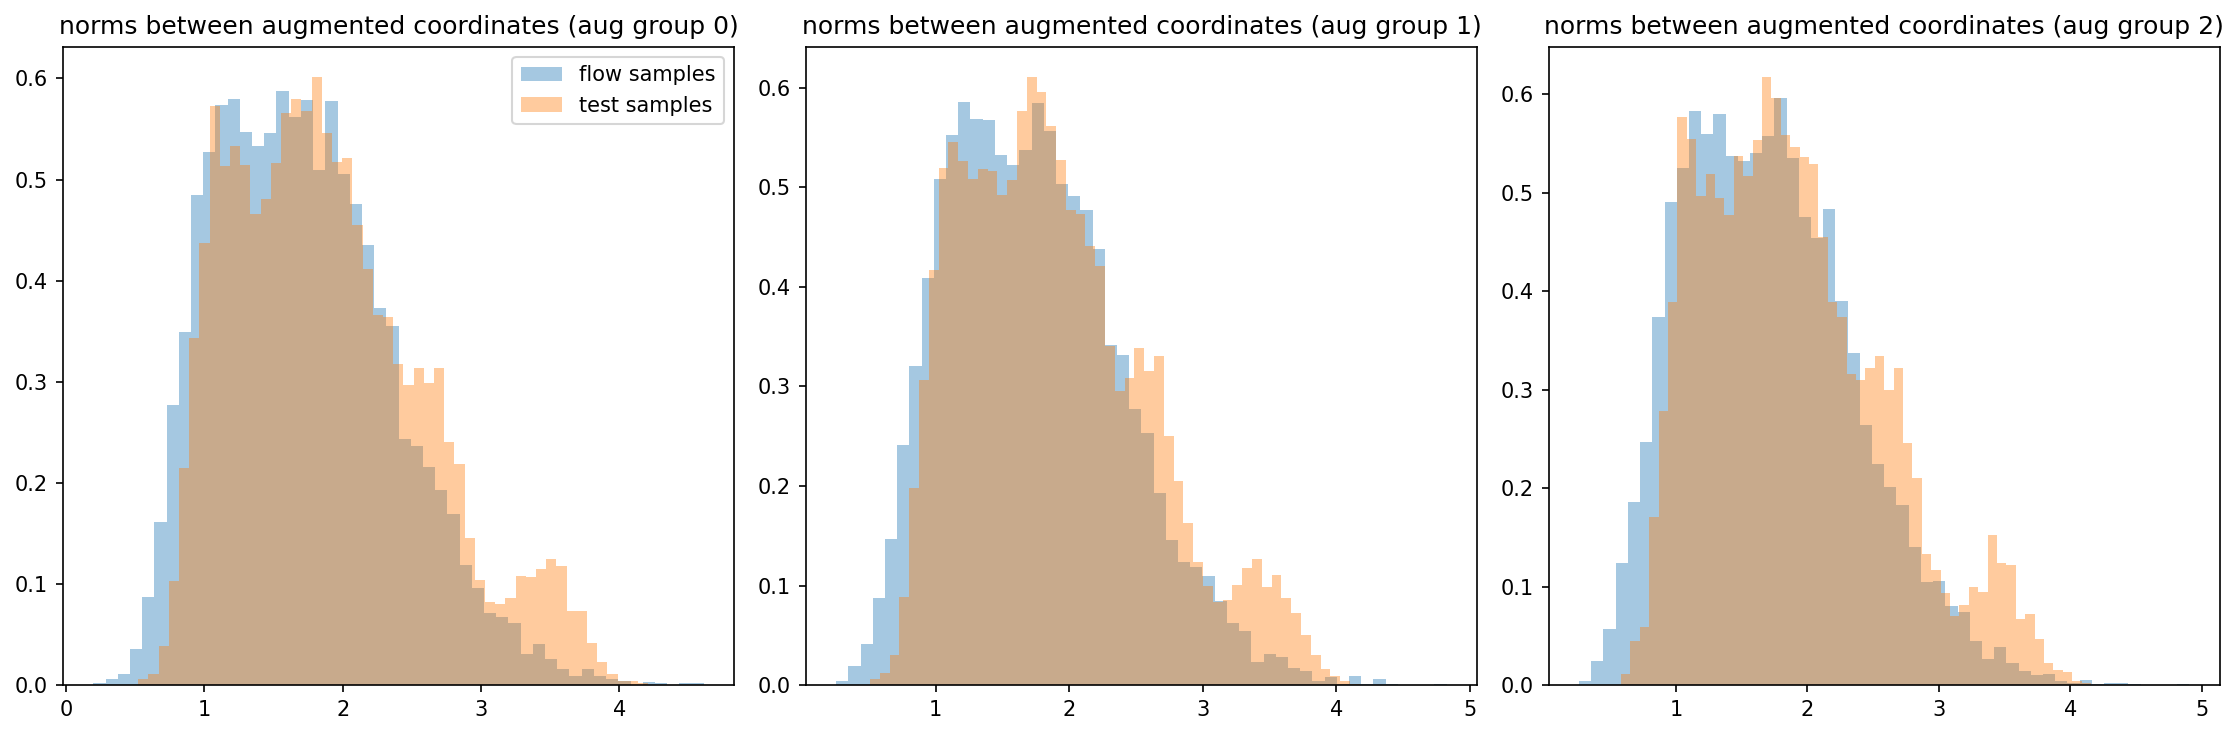

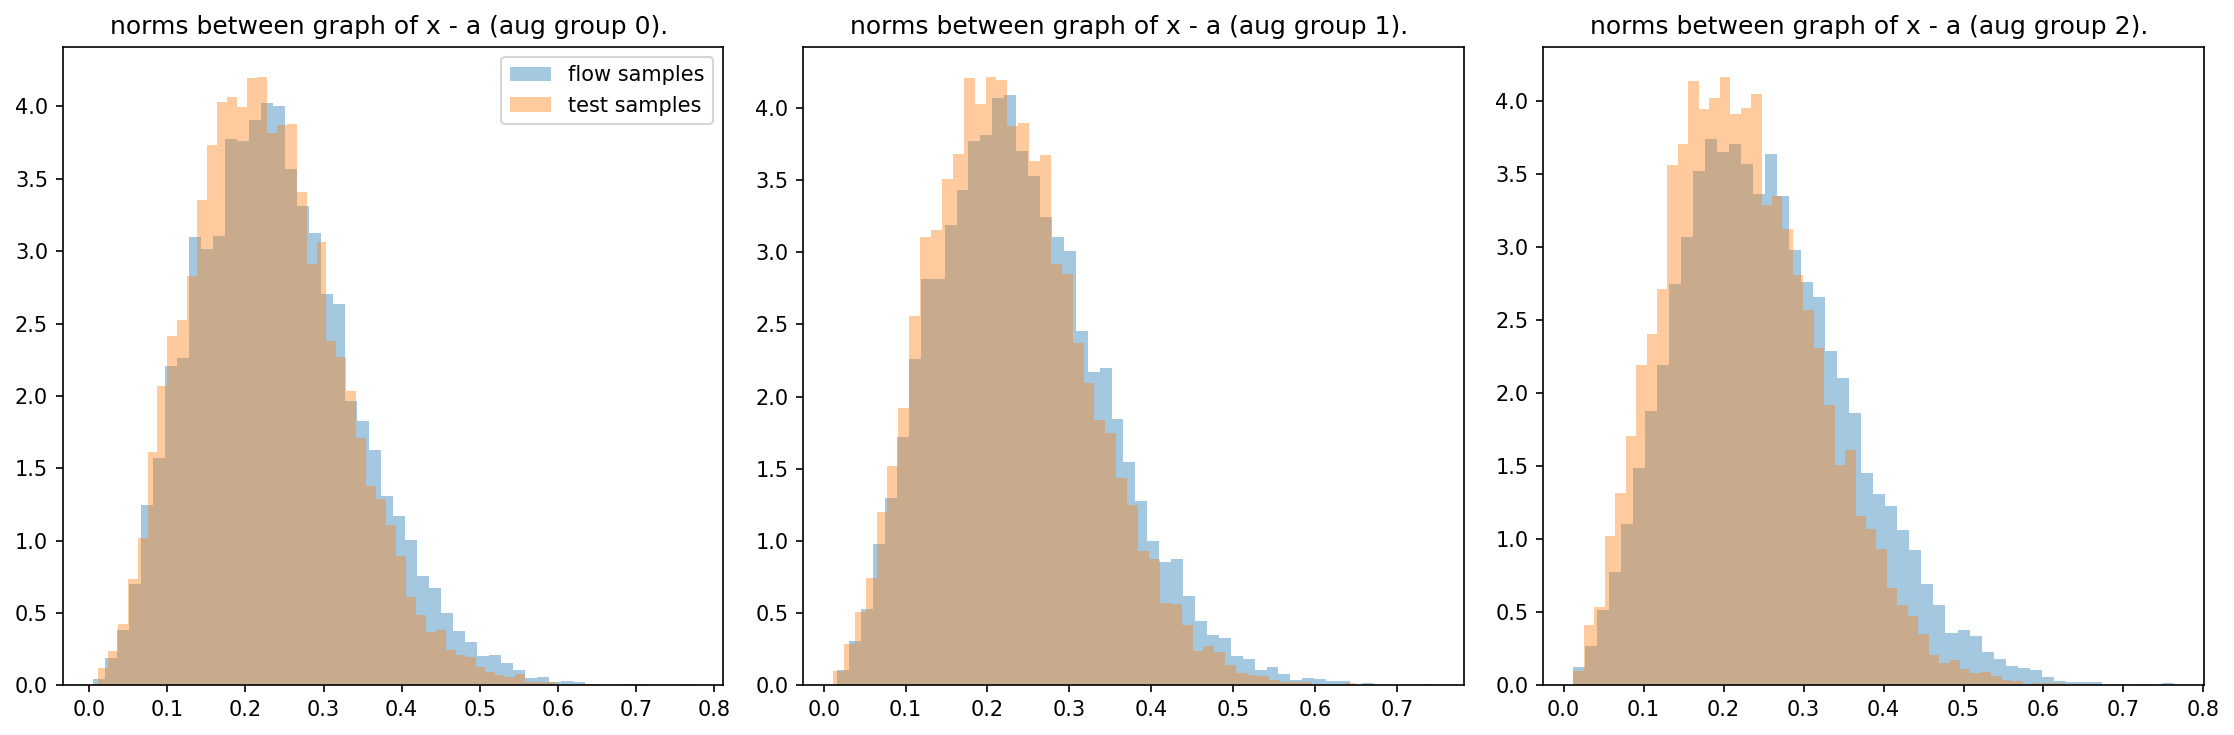

 22%|█████████▎                                | 57/256 [03:45<11:37,  3.51s/it]

{'ess_marginal': Array(0.12991875, dtype=float32), 'eval_log_lik': Array(66.41423, dtype=float32), 'marginal_log_lik': Array(-32.992634, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00012342, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(3.6404977e-05, dtype=float32), 'var_log_w': Array(11.910675, dtype=float32)}


 28%|███████████▊                              | 72/256 [04:11<05:15,  1.71s/it]

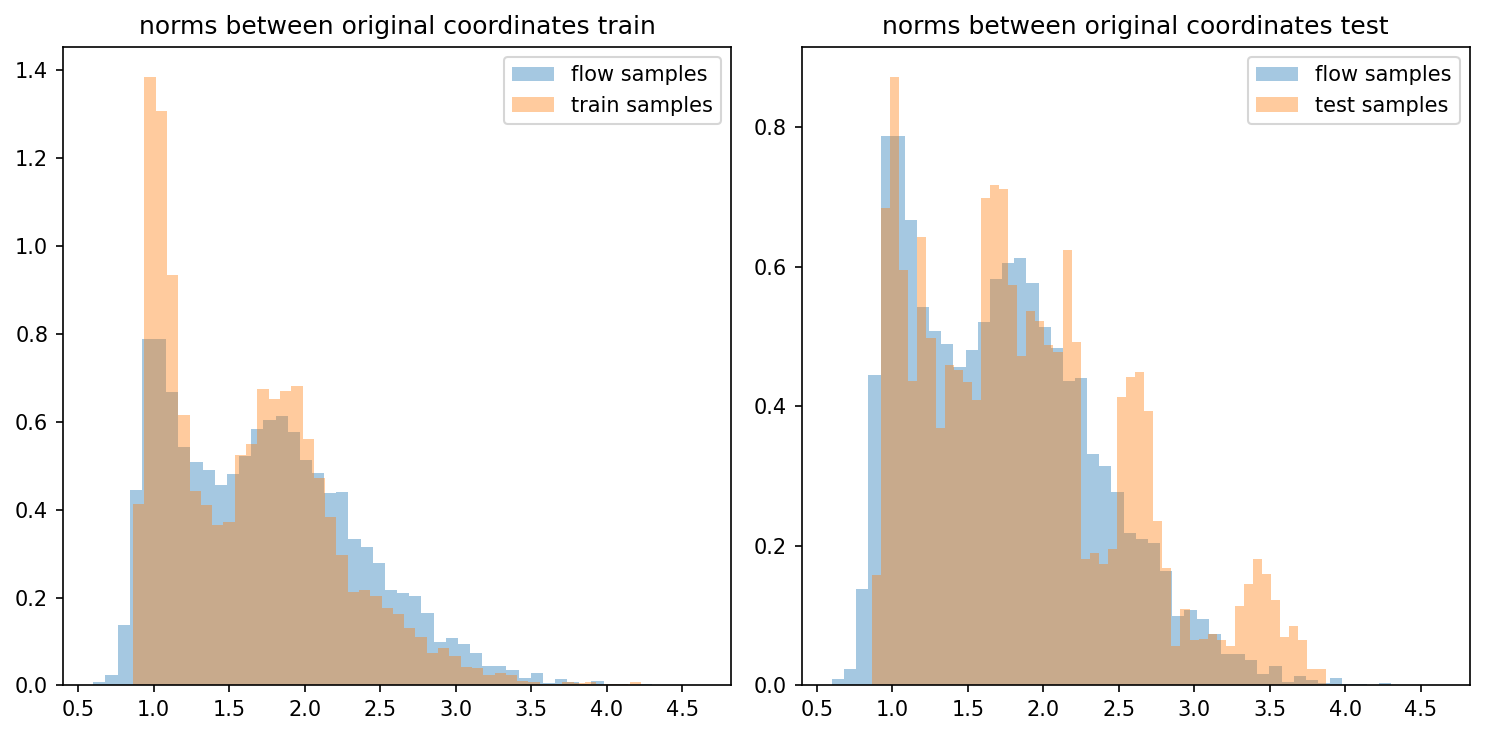

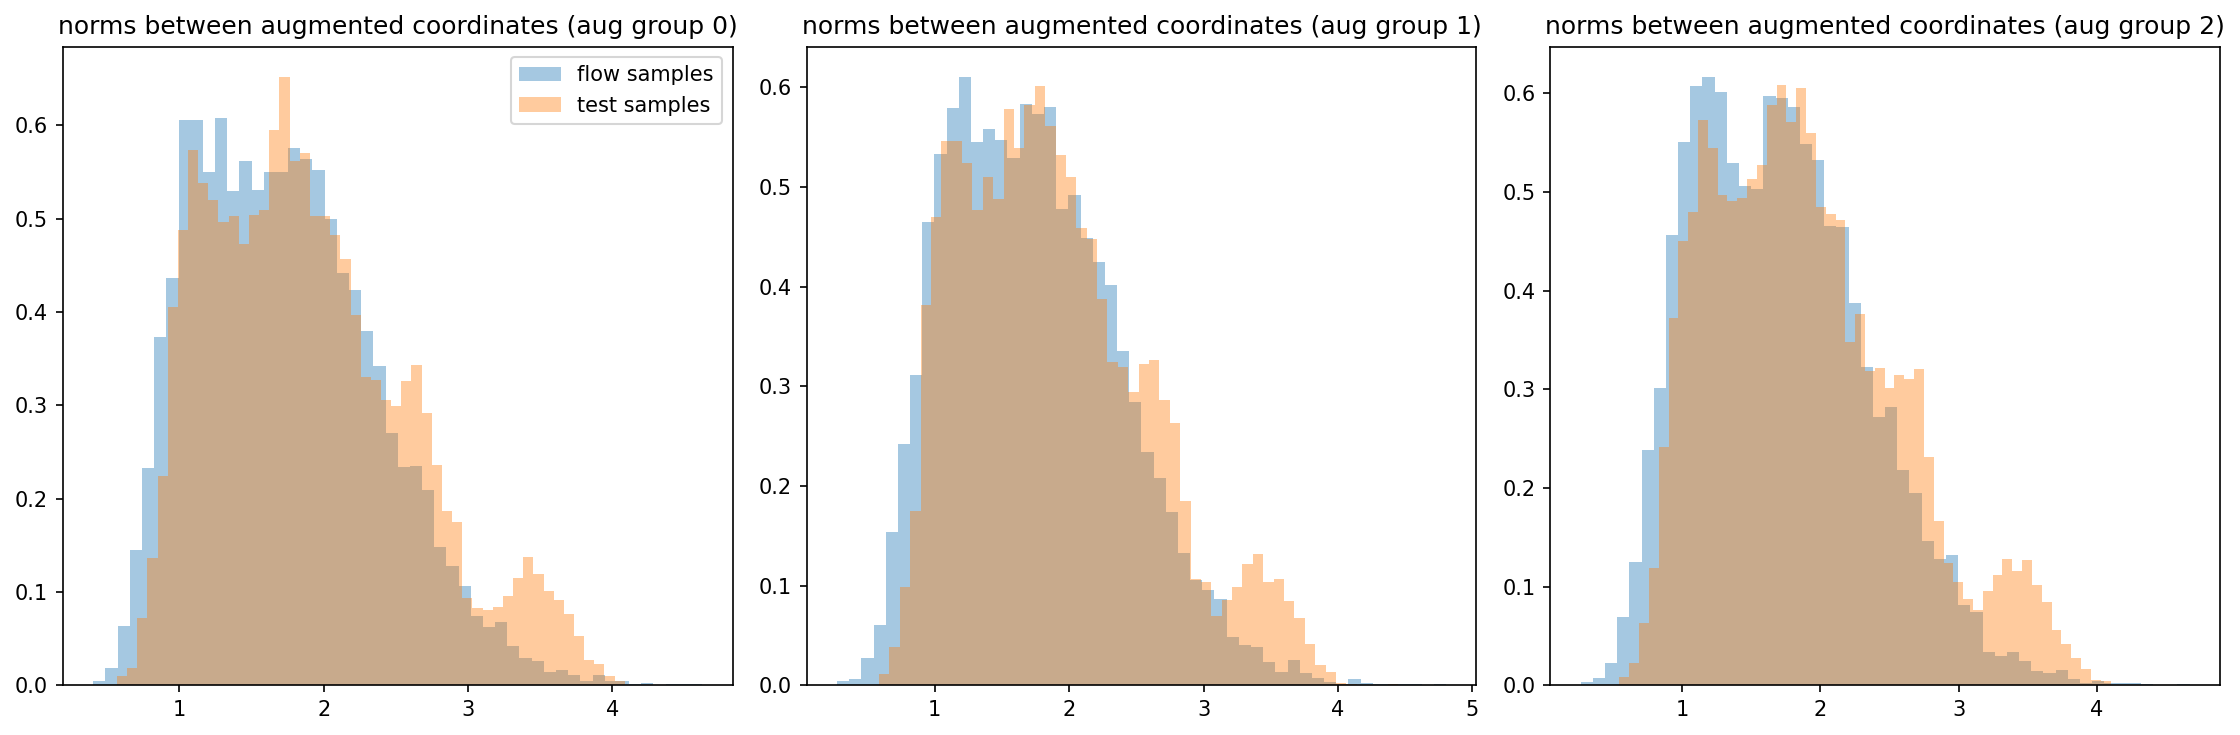

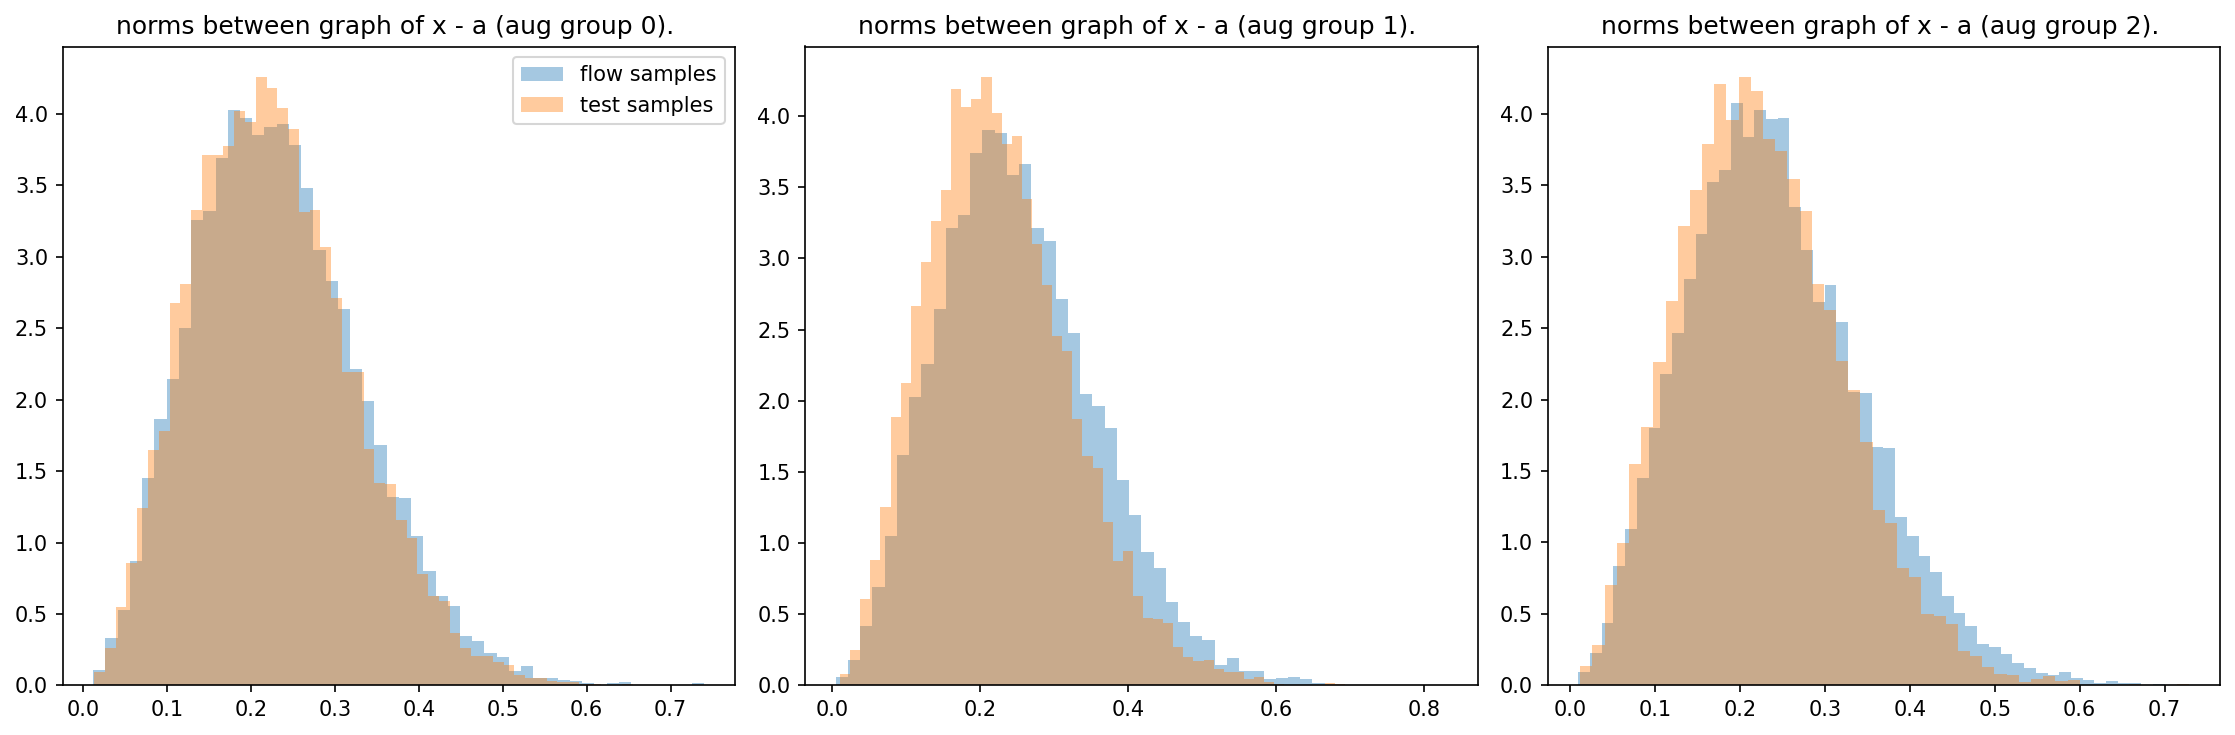

 34%|██████████████                            | 86/256 [05:02<10:06,  3.56s/it]

{'ess_marginal': Array(0.13713782, dtype=float32), 'eval_log_lik': Array(68.02632, dtype=float32), 'marginal_log_lik': Array(-31.763062, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00012847, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(3.452839e-05, dtype=float32), 'var_log_w': Array(10.239828, dtype=float32)}


 43%|█████████████████▍                       | 109/256 [05:41<04:10,  1.71s/it]

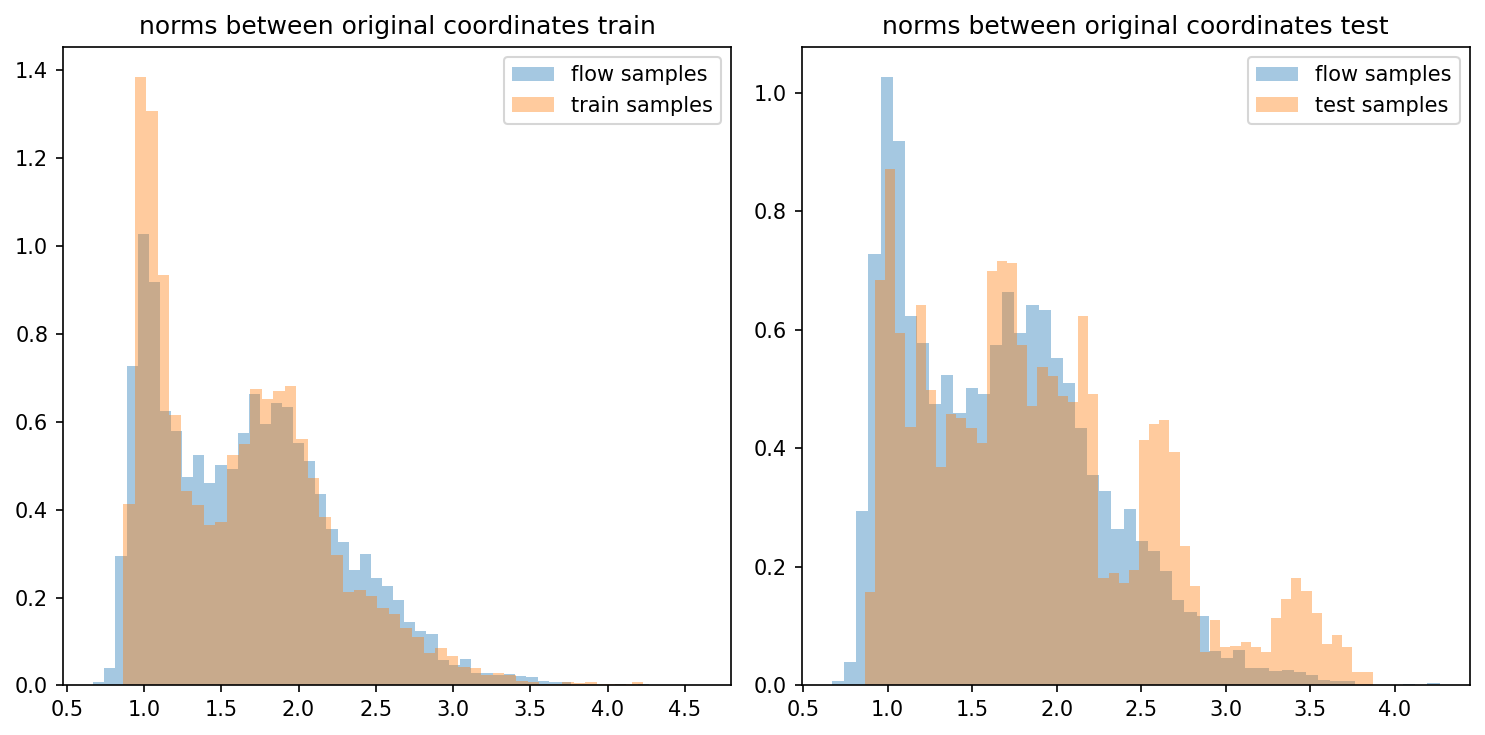

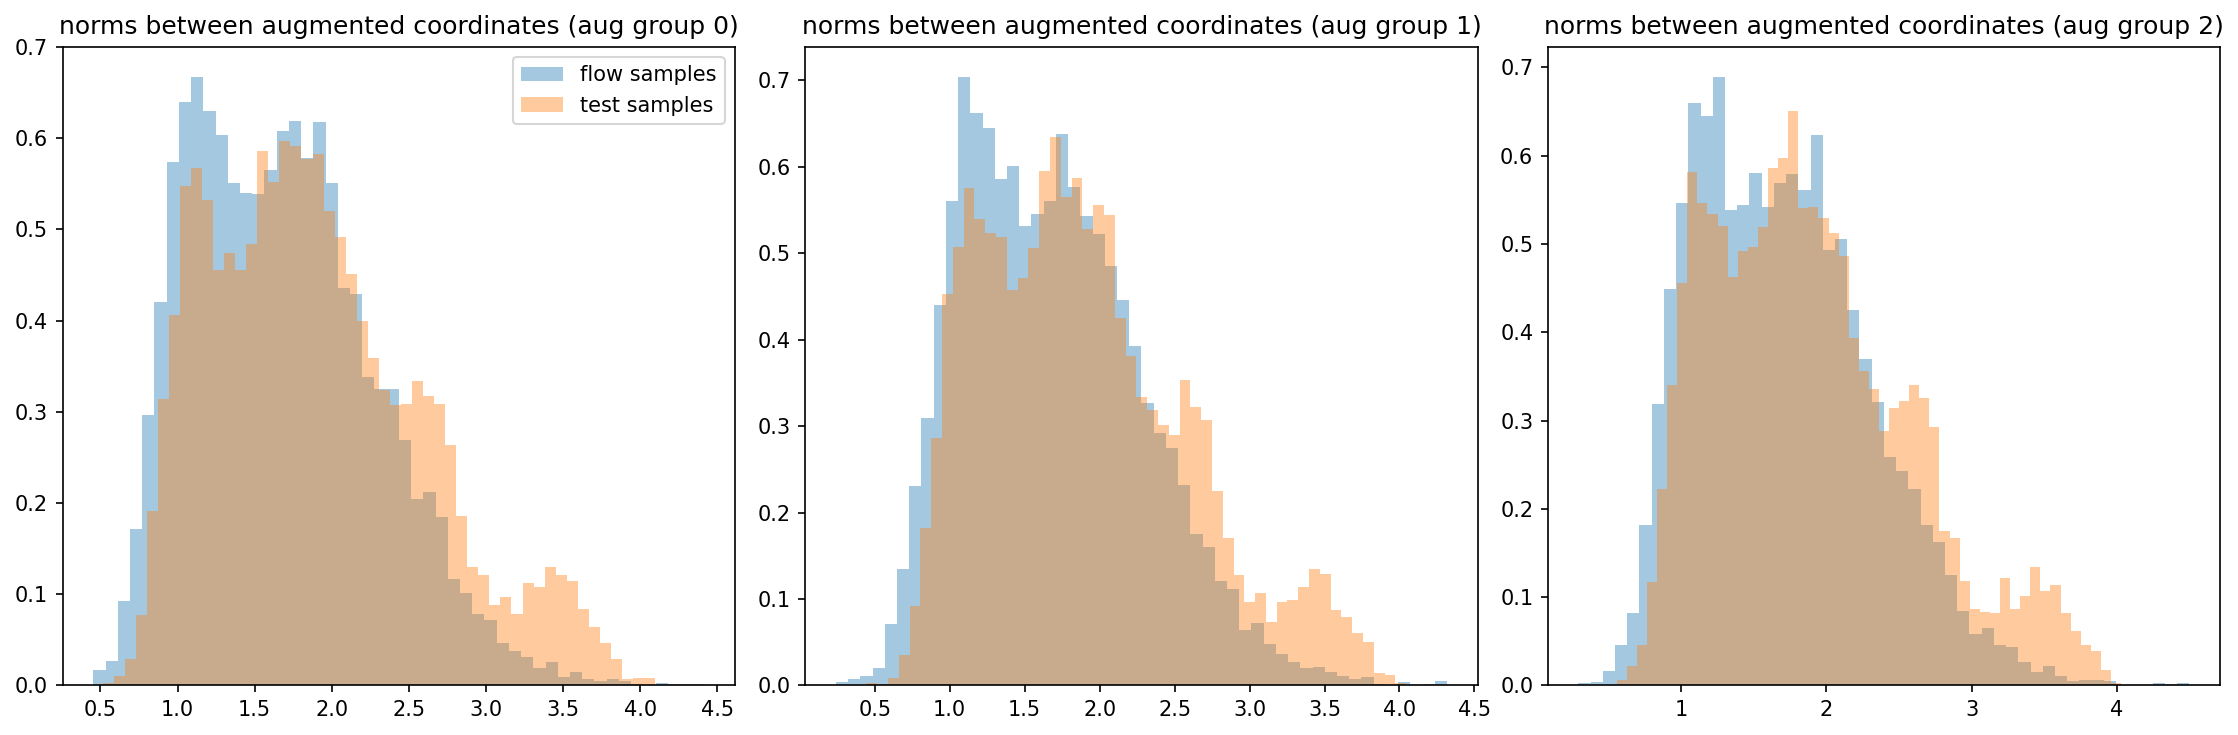

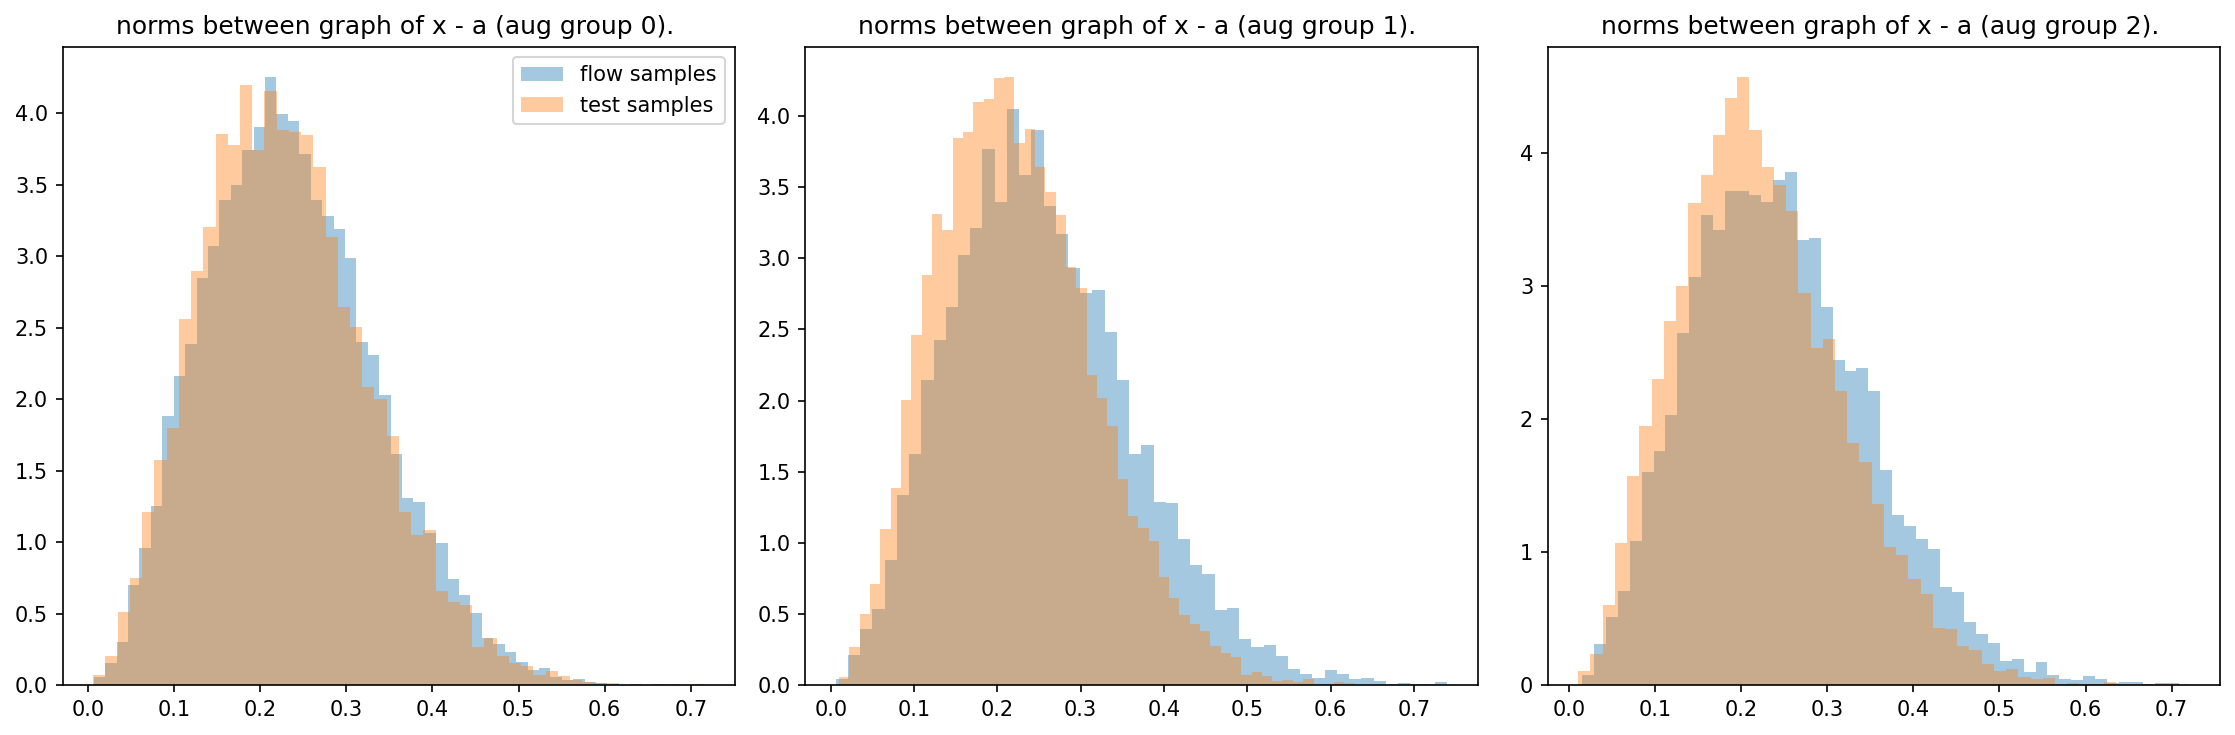

 45%|██████████████████▎                      | 114/256 [06:16<11:40,  4.93s/it]

{'ess_marginal': Array(0.14154232, dtype=float32), 'eval_log_lik': Array(69.24097, dtype=float32), 'marginal_log_lik': Array(-30.787655, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00012798, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(3.720868e-05, dtype=float32), 'var_log_w': Array(9.734976, dtype=float32)}


 55%|██████████████████████▋                  | 142/256 [07:09<06:41,  3.52s/it]

{'ess_marginal': Array(0.14600147, dtype=float32), 'eval_log_lik': Array(68.6255, dtype=float32), 'marginal_log_lik': Array(-31.582644, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00012256, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(3.5824312e-05, dtype=float32), 'var_log_w': Array(8.394414, dtype=float32)}


 57%|███████████████████████▏                 | 145/256 [07:14<04:19,  2.34s/it]

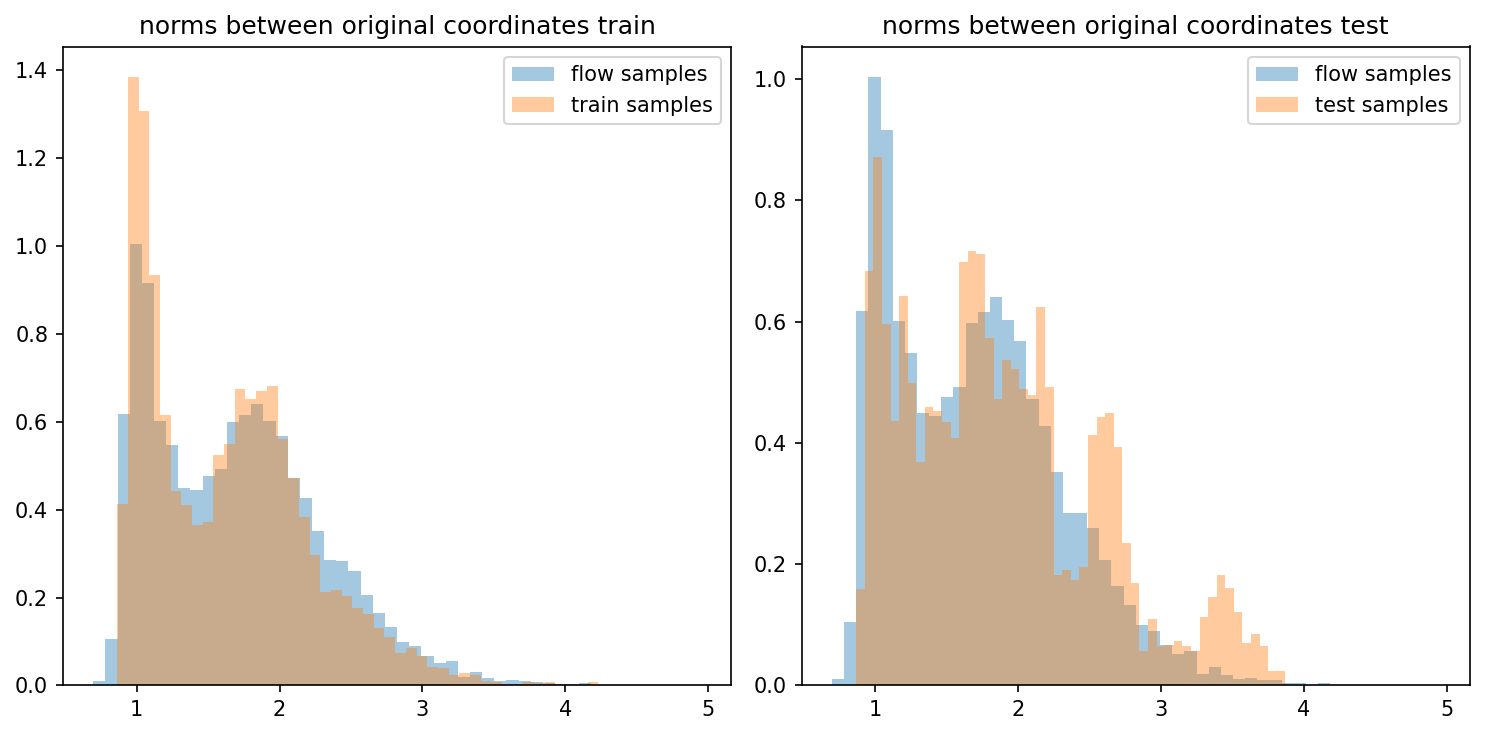

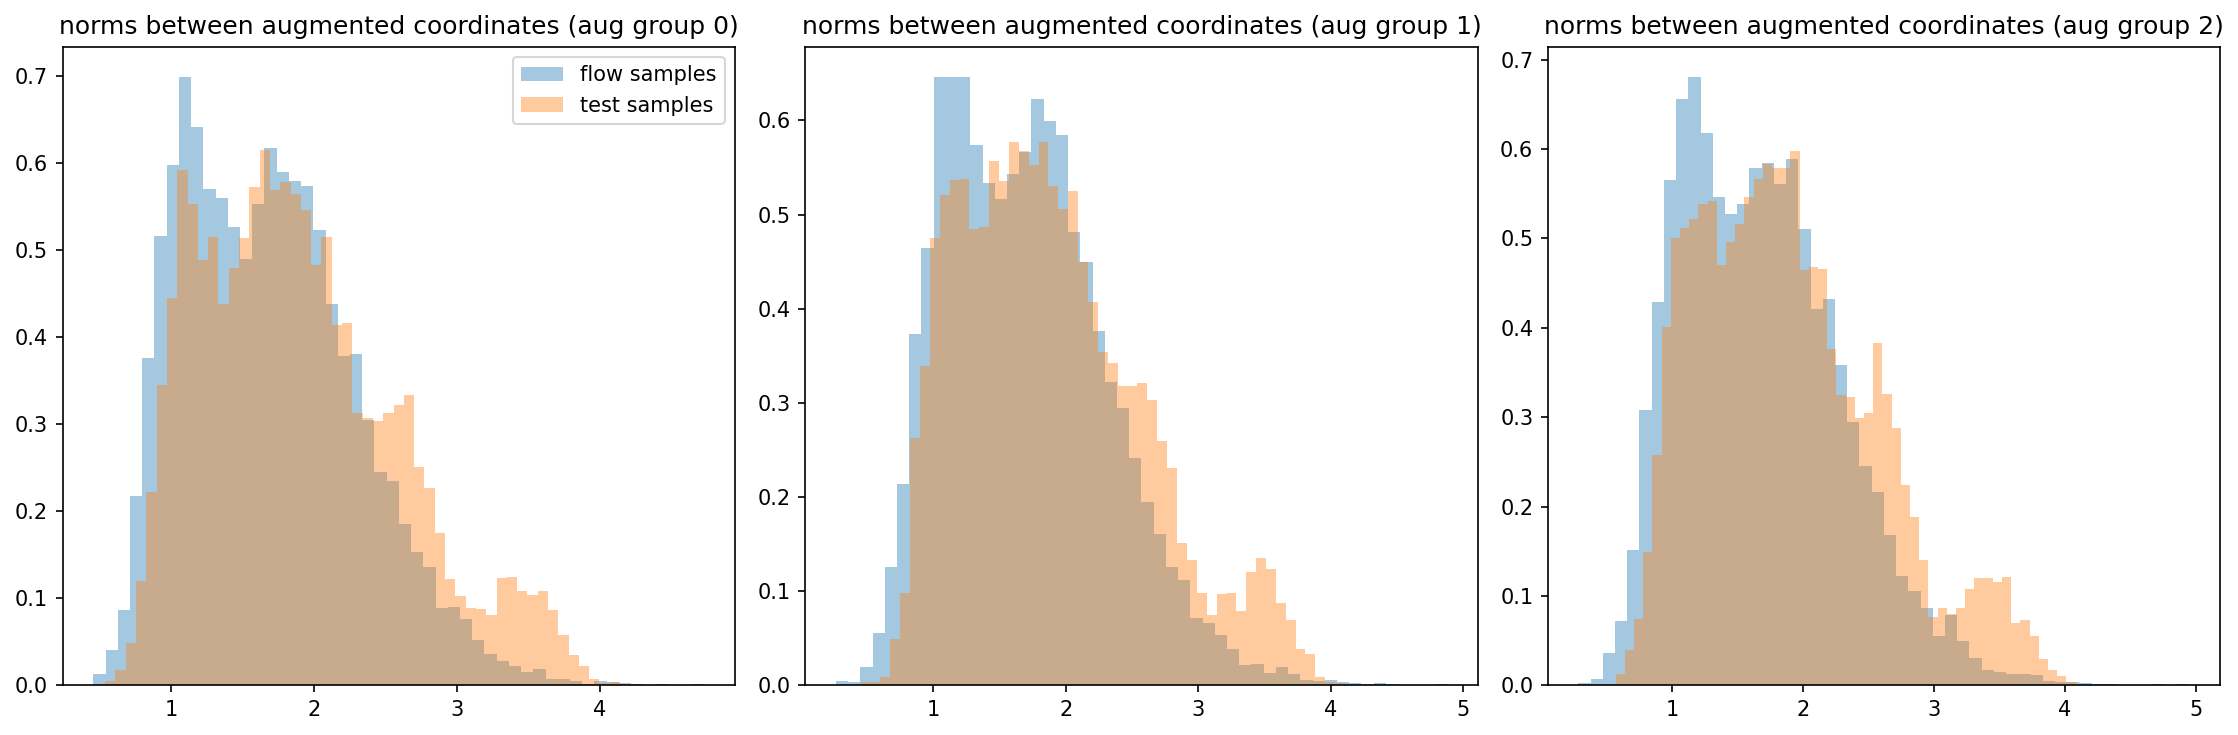

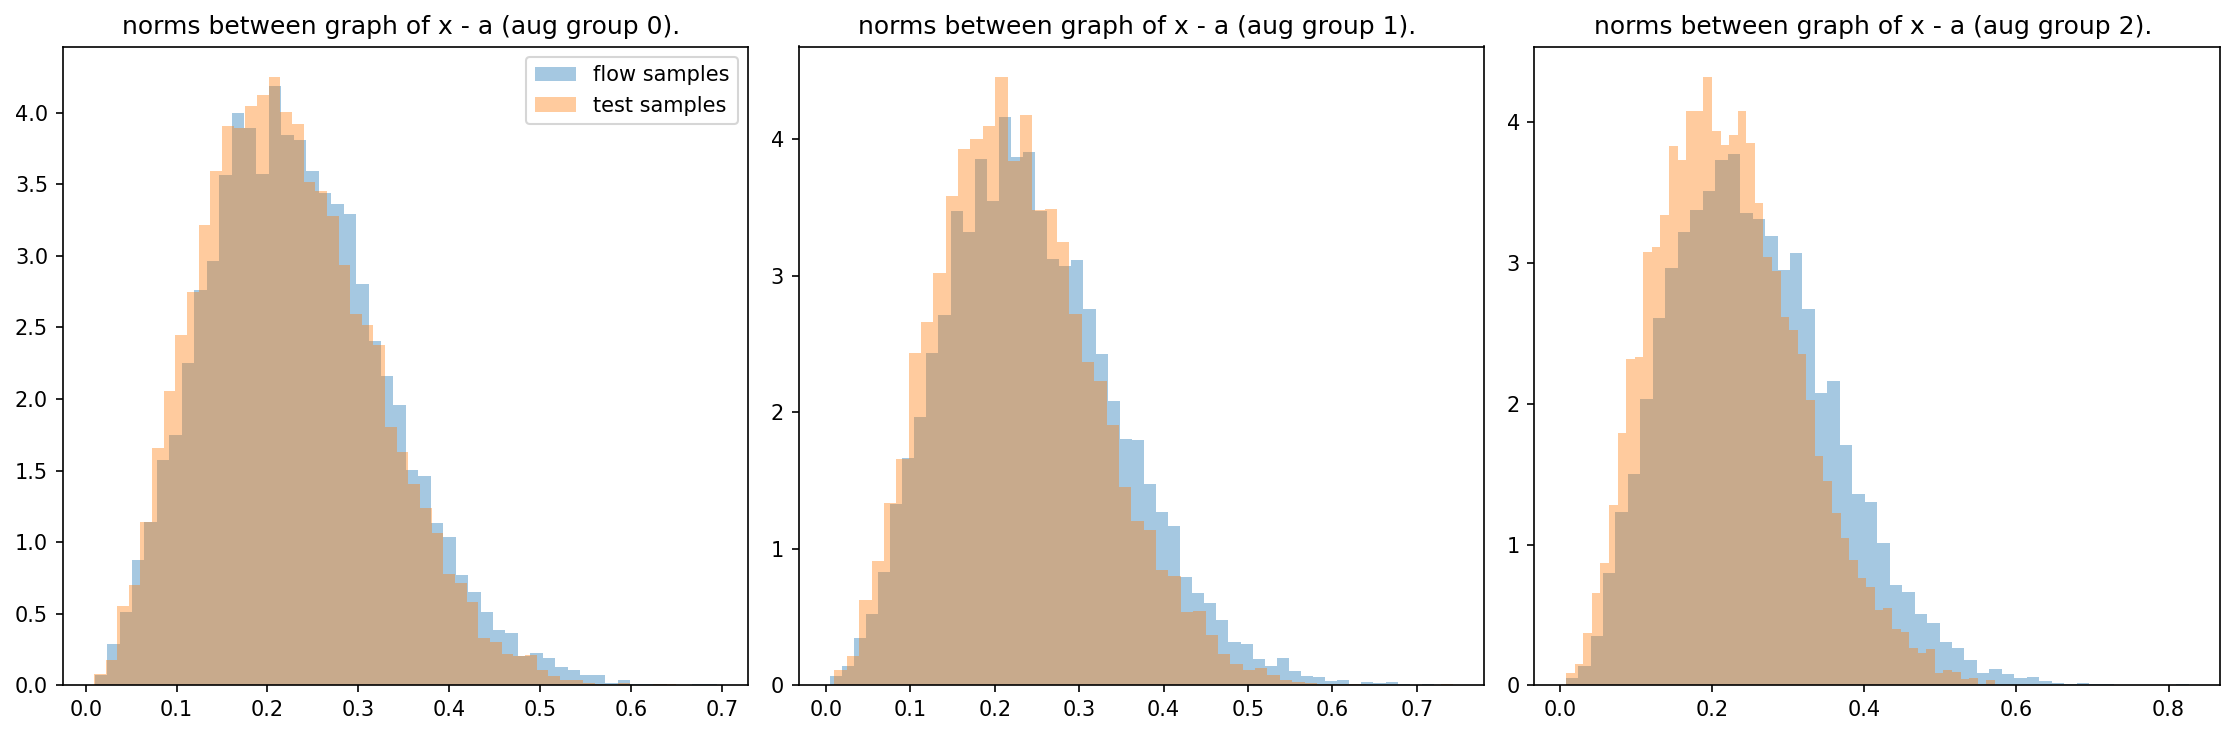

 67%|███████████████████████████▍             | 171/256 [08:25<04:58,  3.51s/it]

{'ess_marginal': Array(0.15320364, dtype=float32), 'eval_log_lik': Array(69.78403, dtype=float32), 'marginal_log_lik': Array(-30.666826, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(9.918213e-05, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(3.143664e-05, dtype=float32), 'var_log_w': Array(7.440807, dtype=float32)}


 71%|█████████████████████████████▏           | 182/256 [08:44<02:09,  1.75s/it]

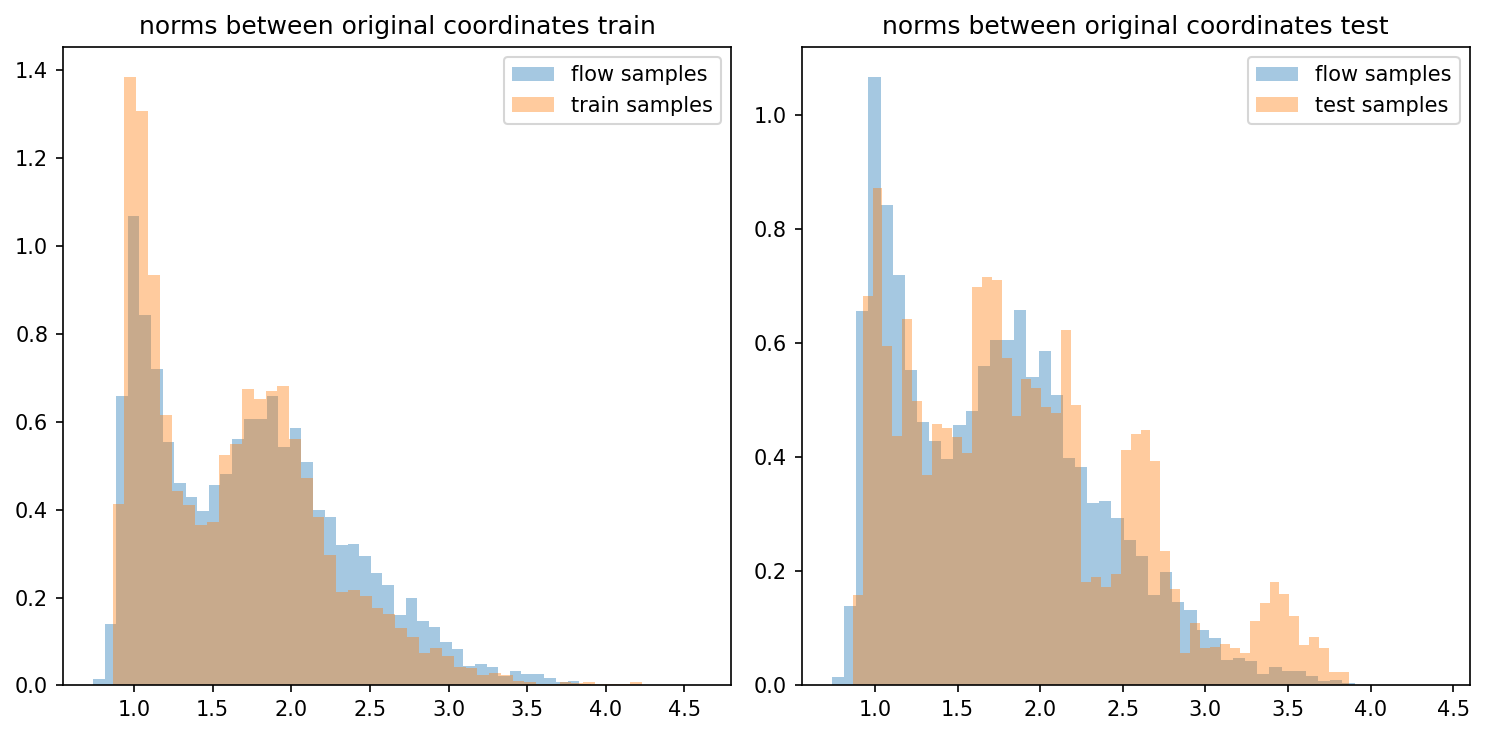

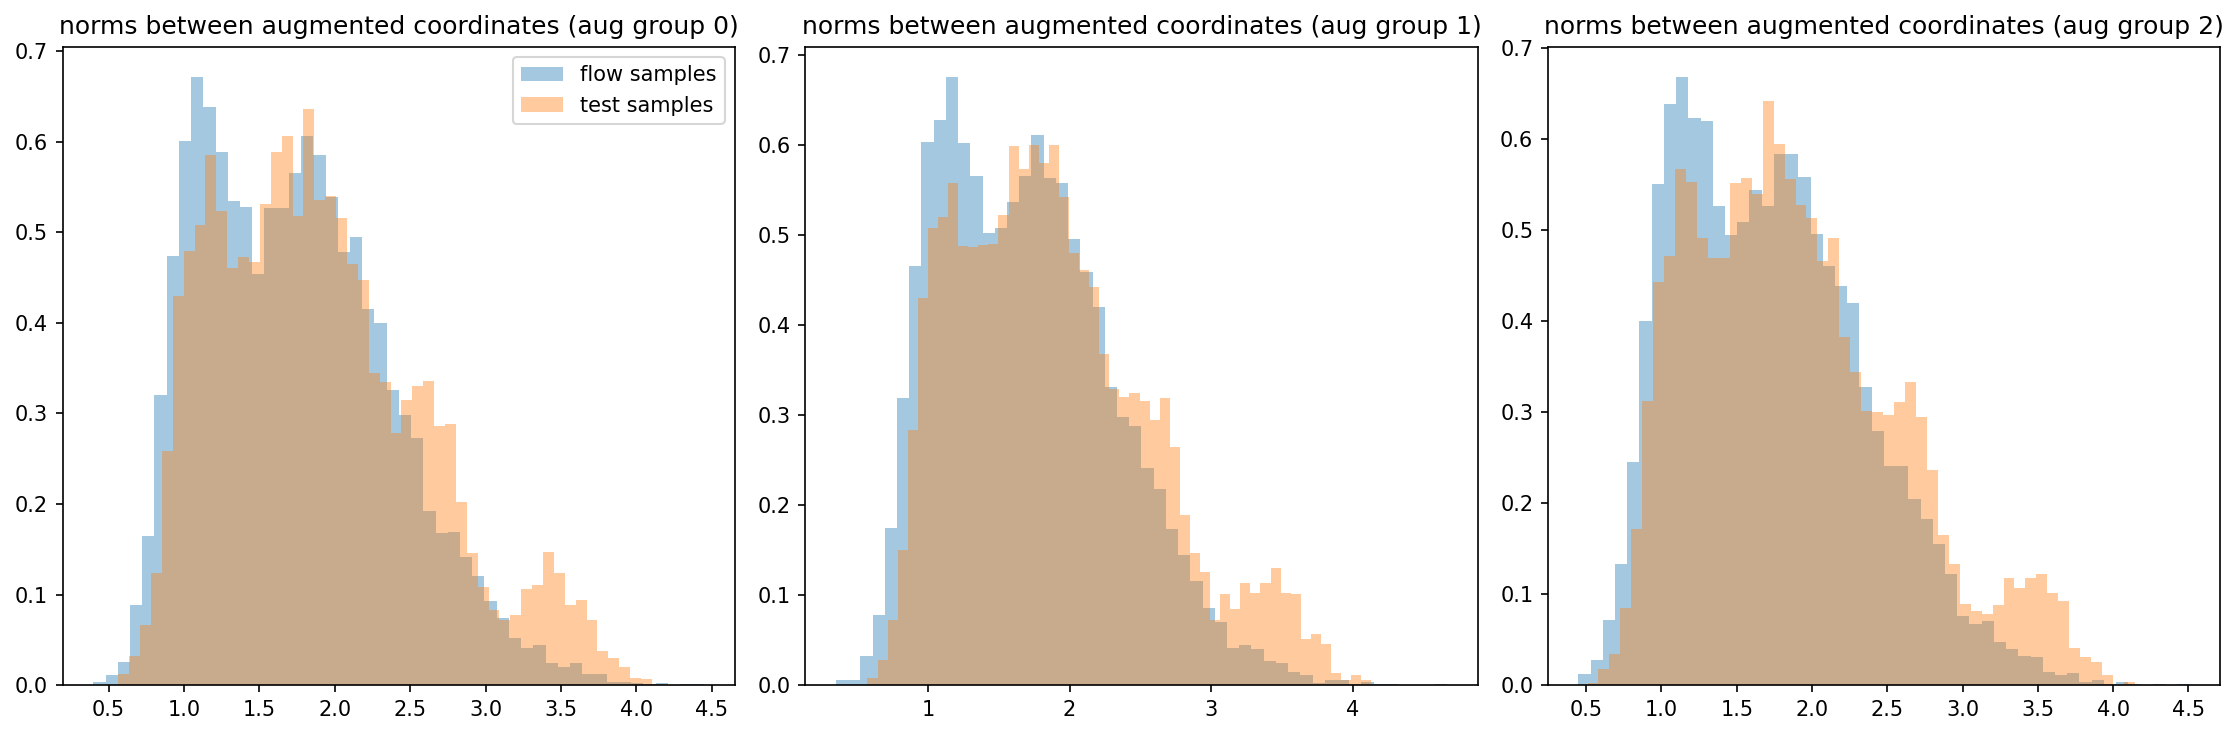

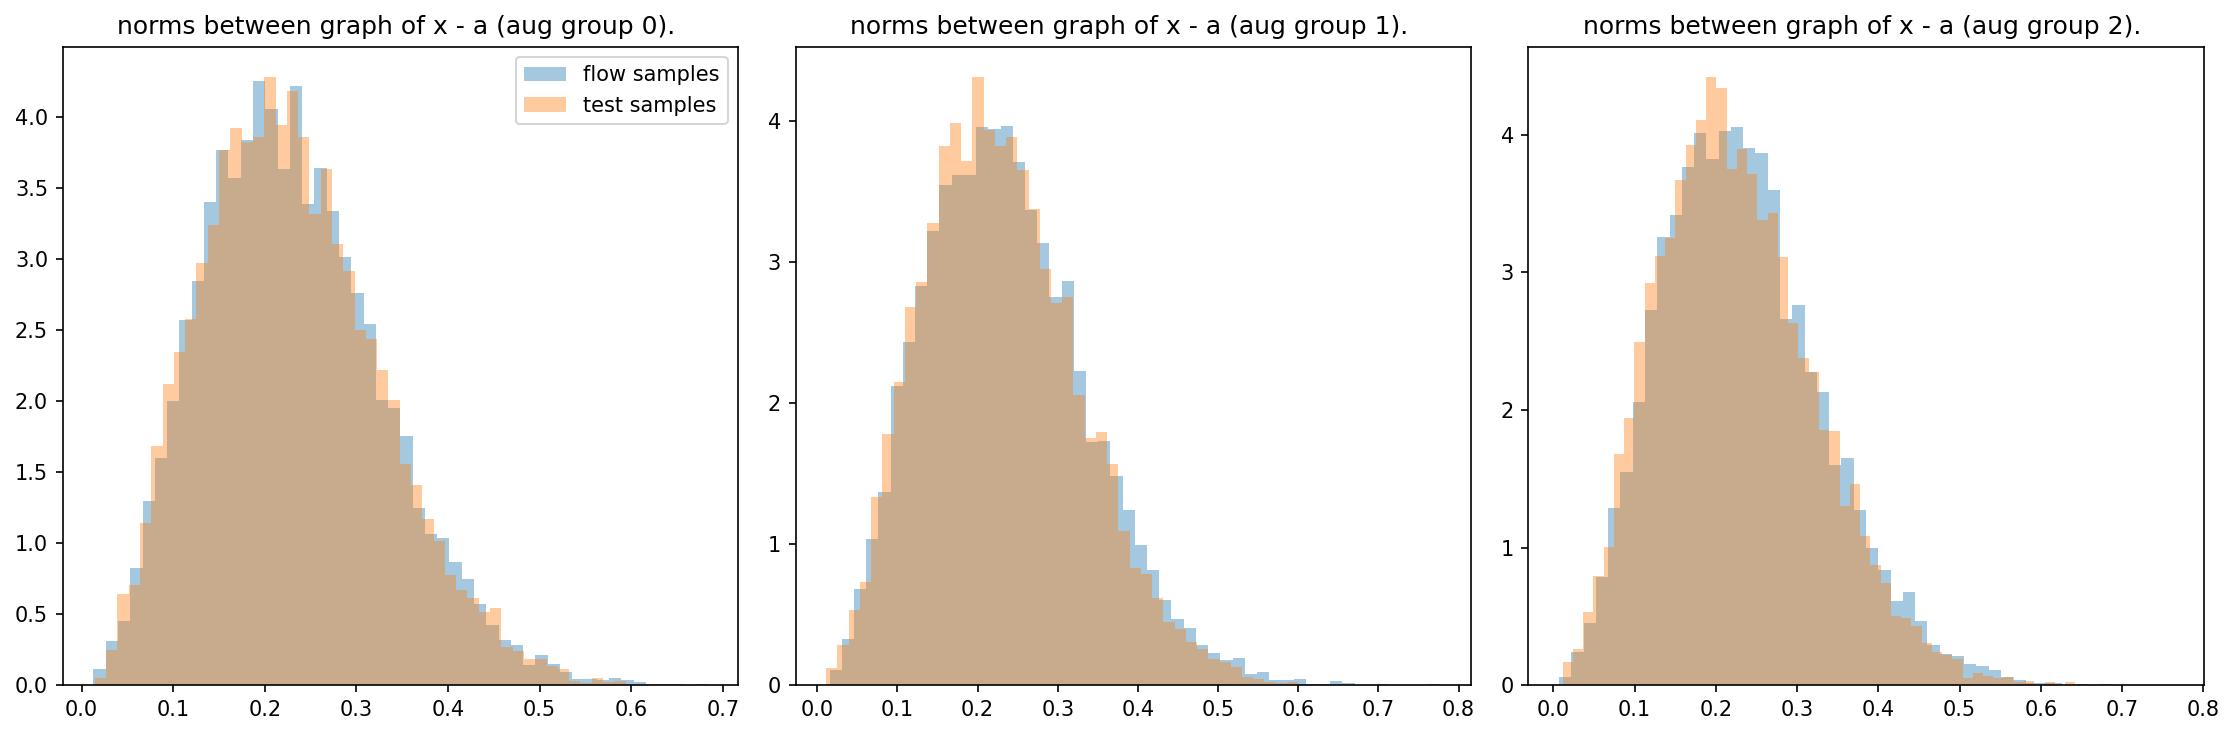

 78%|███████████████████████████████▊         | 199/256 [09:40<03:21,  3.53s/it]

{'ess_marginal': Array(0.14797951, dtype=float32), 'eval_log_lik': Array(69.73659, dtype=float32), 'marginal_log_lik': Array(-30.605259, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00010546, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(3.2878692e-05, dtype=float32), 'var_log_w': Array(8.25214, dtype=float32)}


 85%|██████████████████████████████████▉      | 218/256 [10:12<01:04,  1.71s/it]

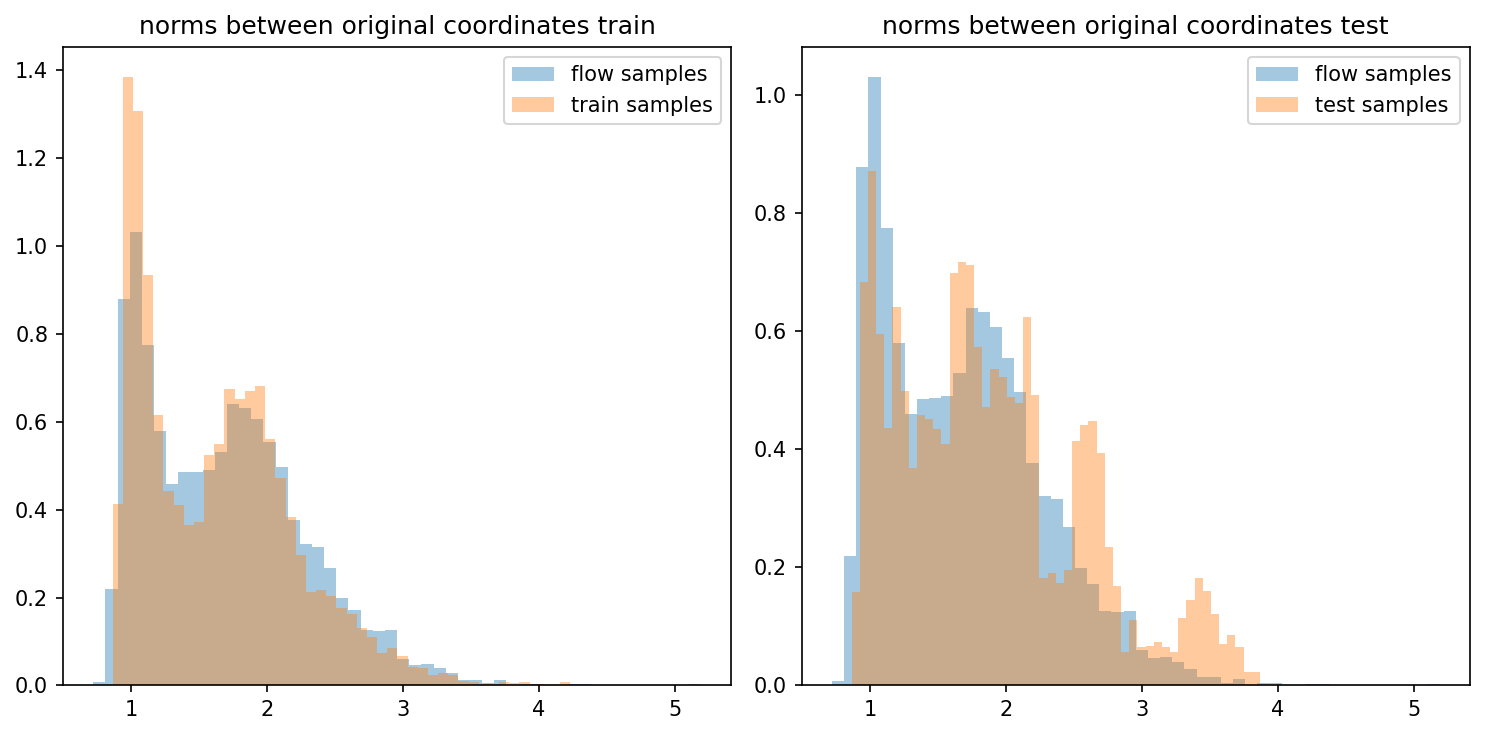

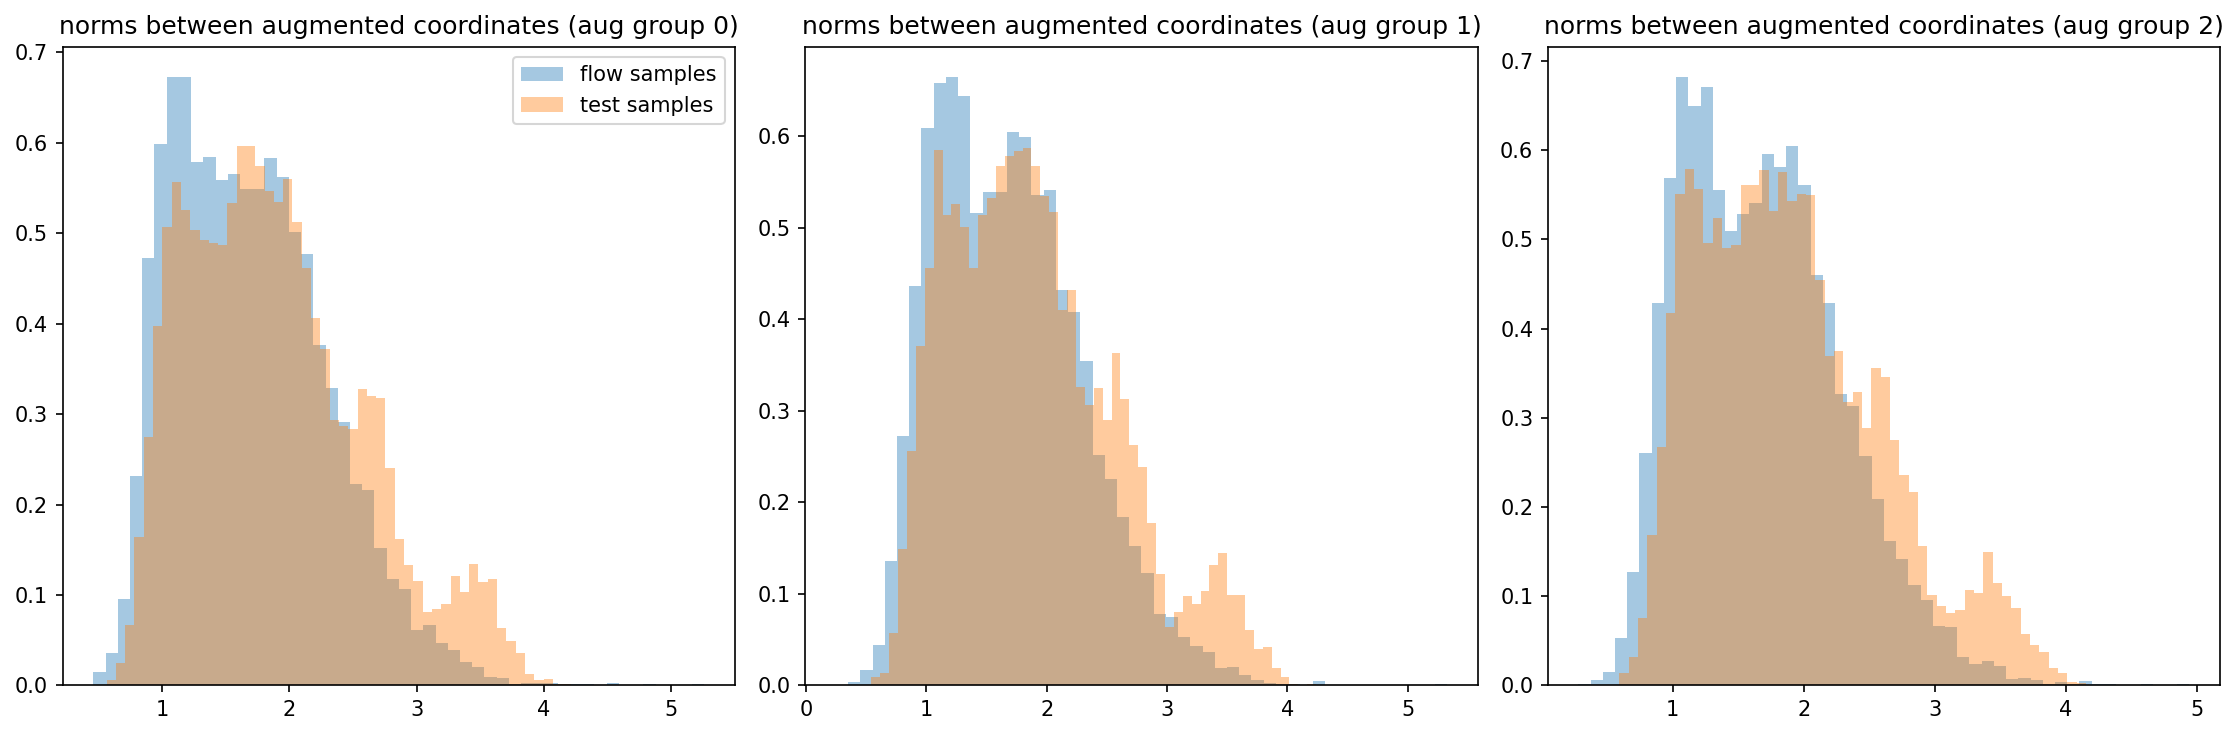

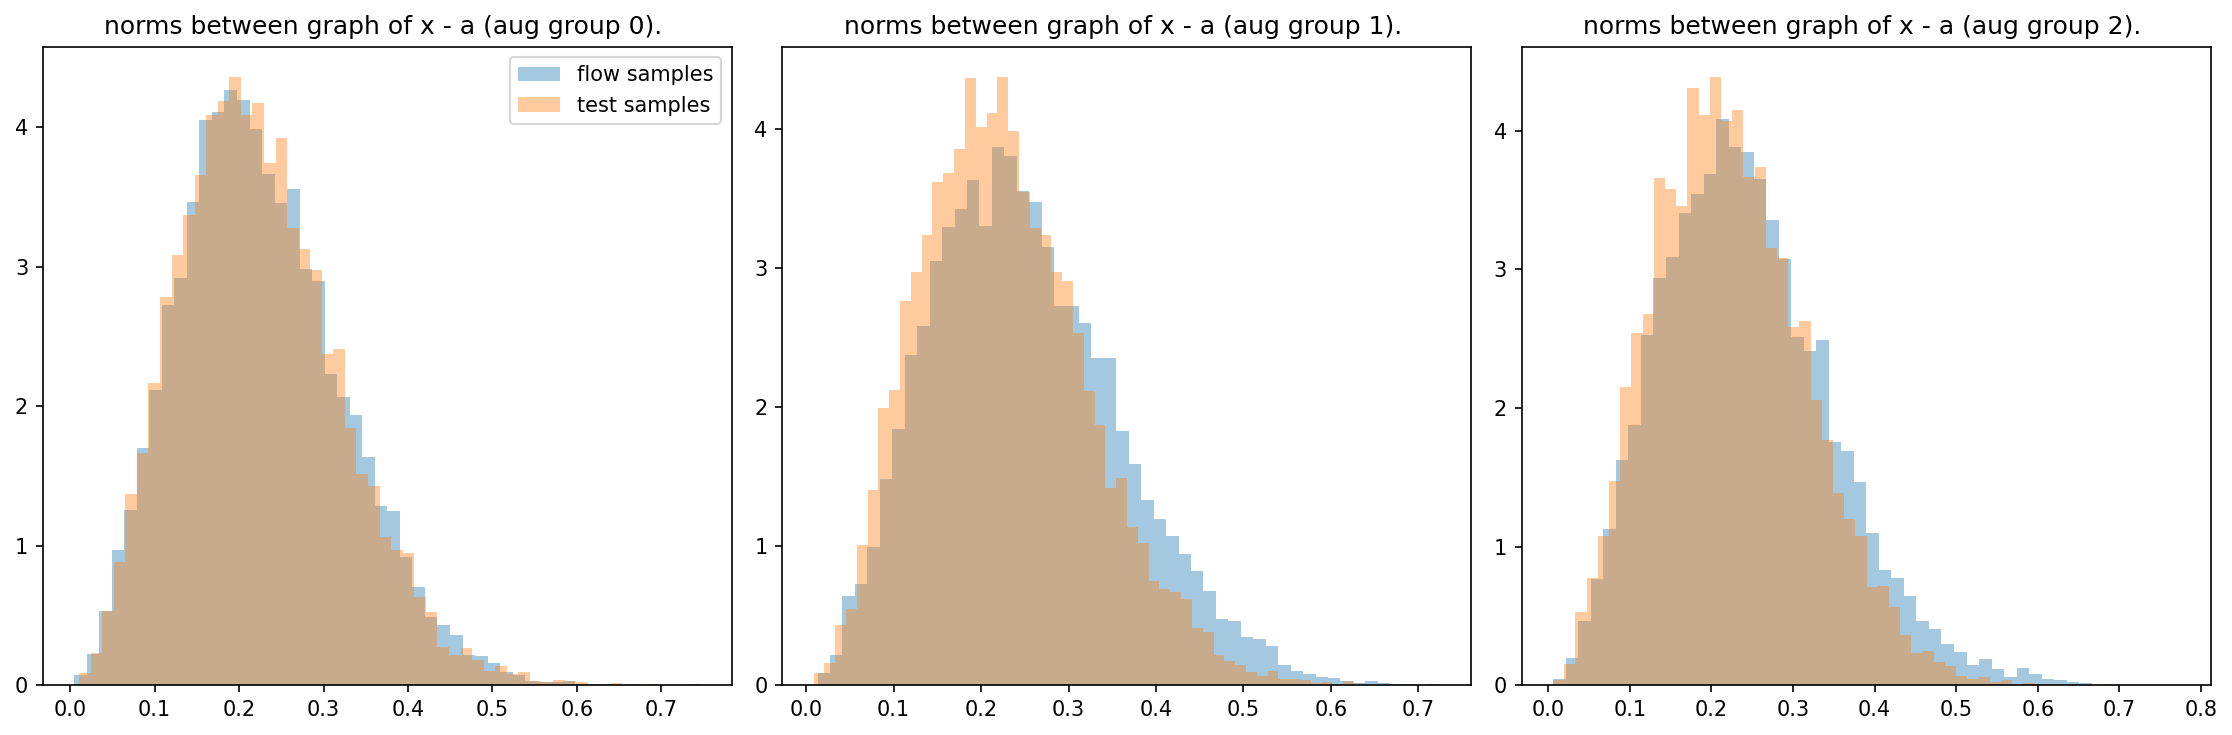

 89%|████████████████████████████████████▎    | 227/256 [10:54<01:51,  3.86s/it]

{'ess_marginal': Array(0.15184067, dtype=float32), 'eval_log_lik': Array(69.428154, dtype=float32), 'marginal_log_lik': Array(-30.790195, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.0001153, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(3.6735688e-05, dtype=float32), 'var_log_w': Array(8.385137, dtype=float32)}


100%|████████████████████████████████████████▊| 255/256 [11:42<00:01,  1.71s/it]

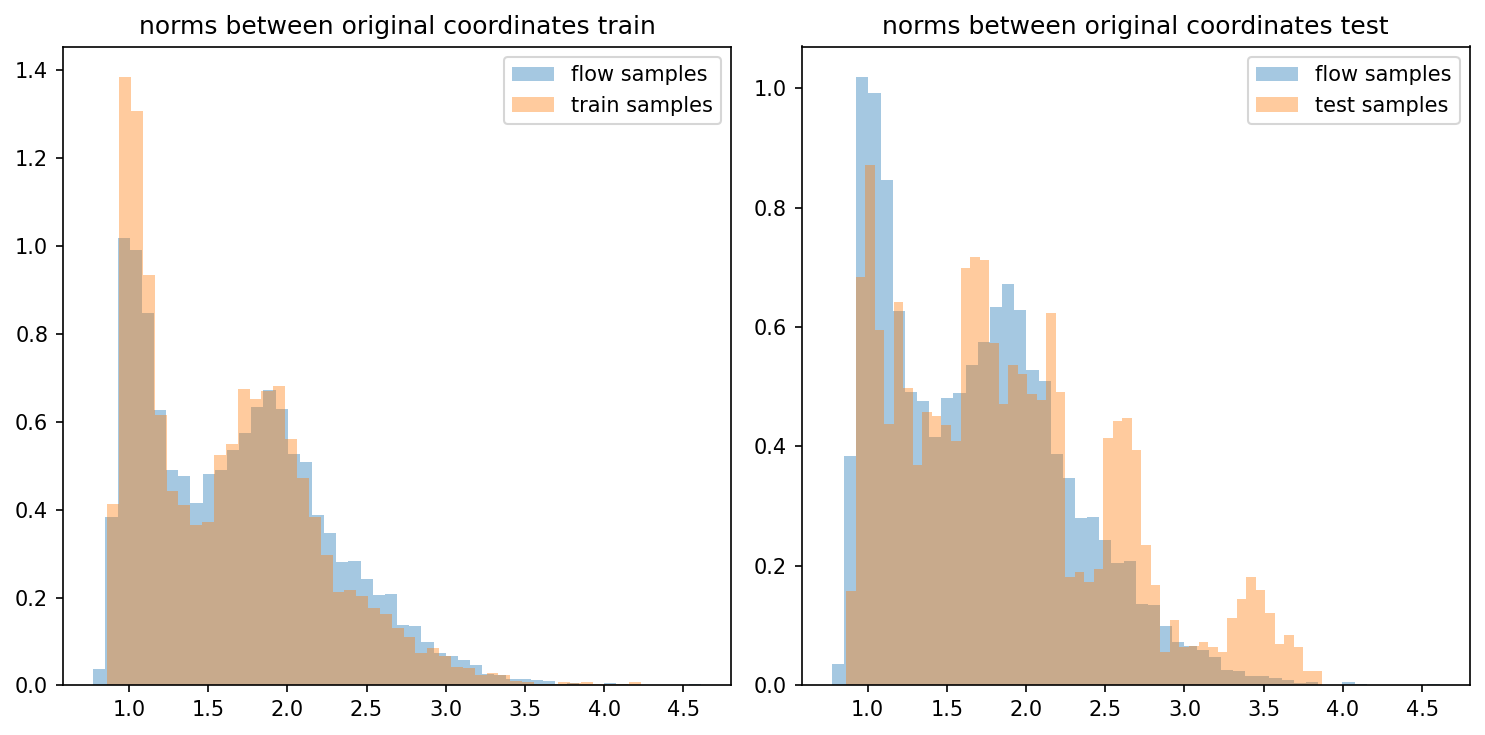

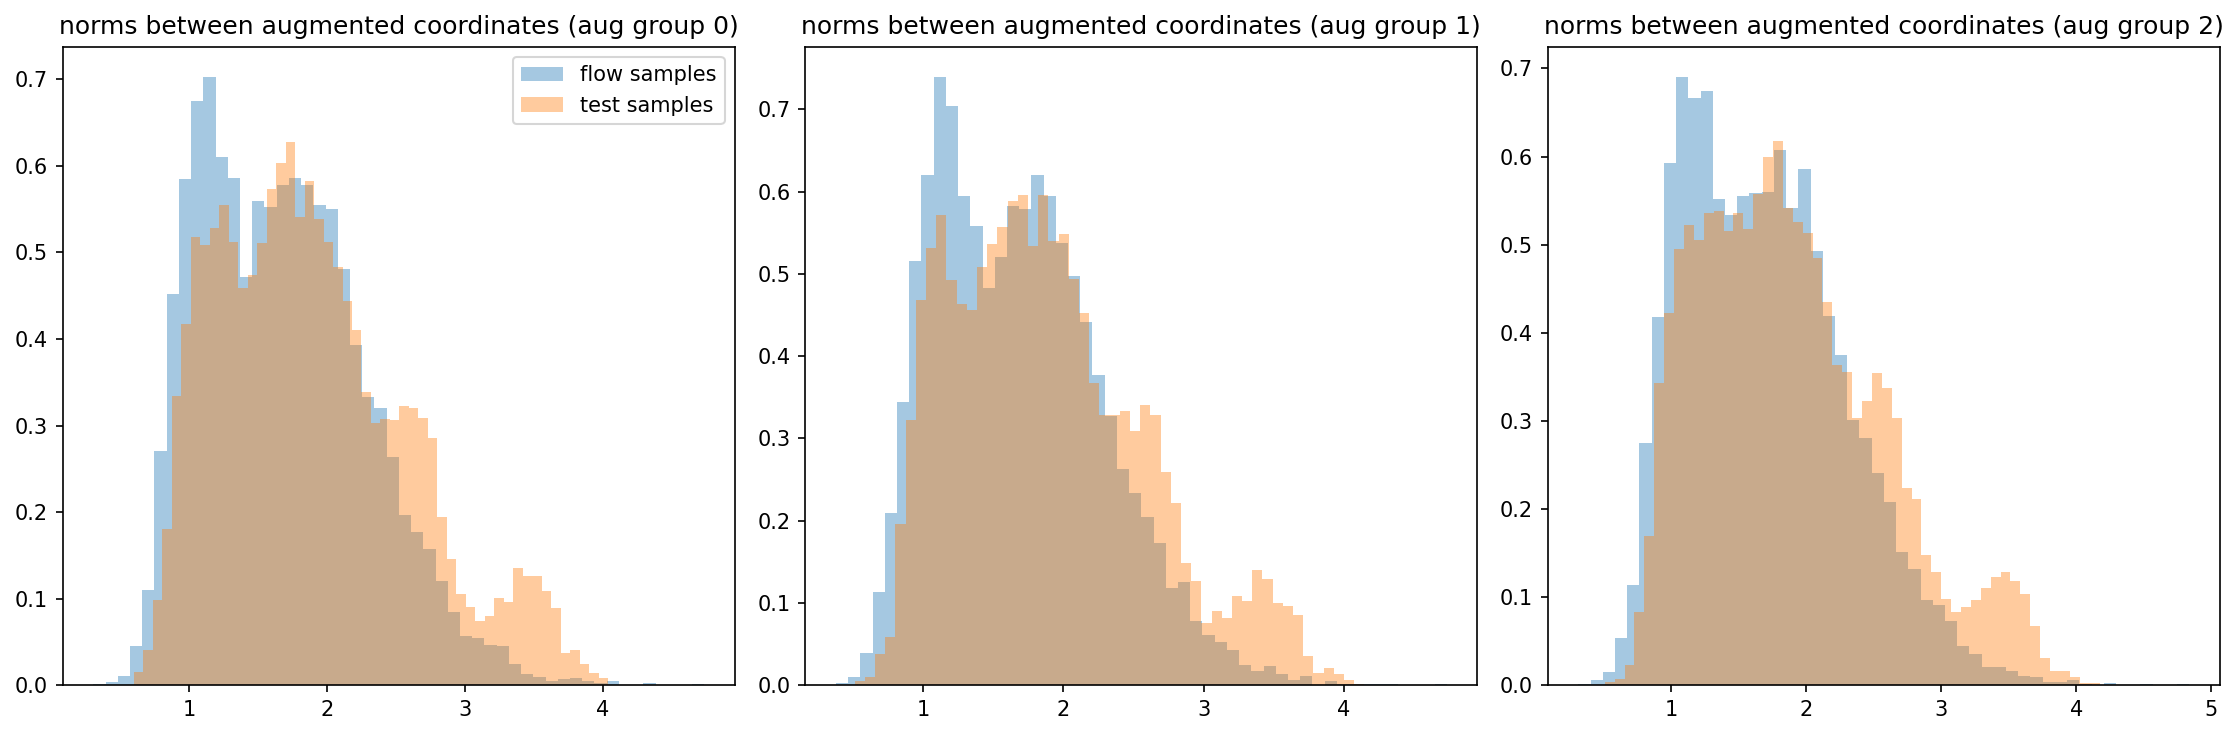

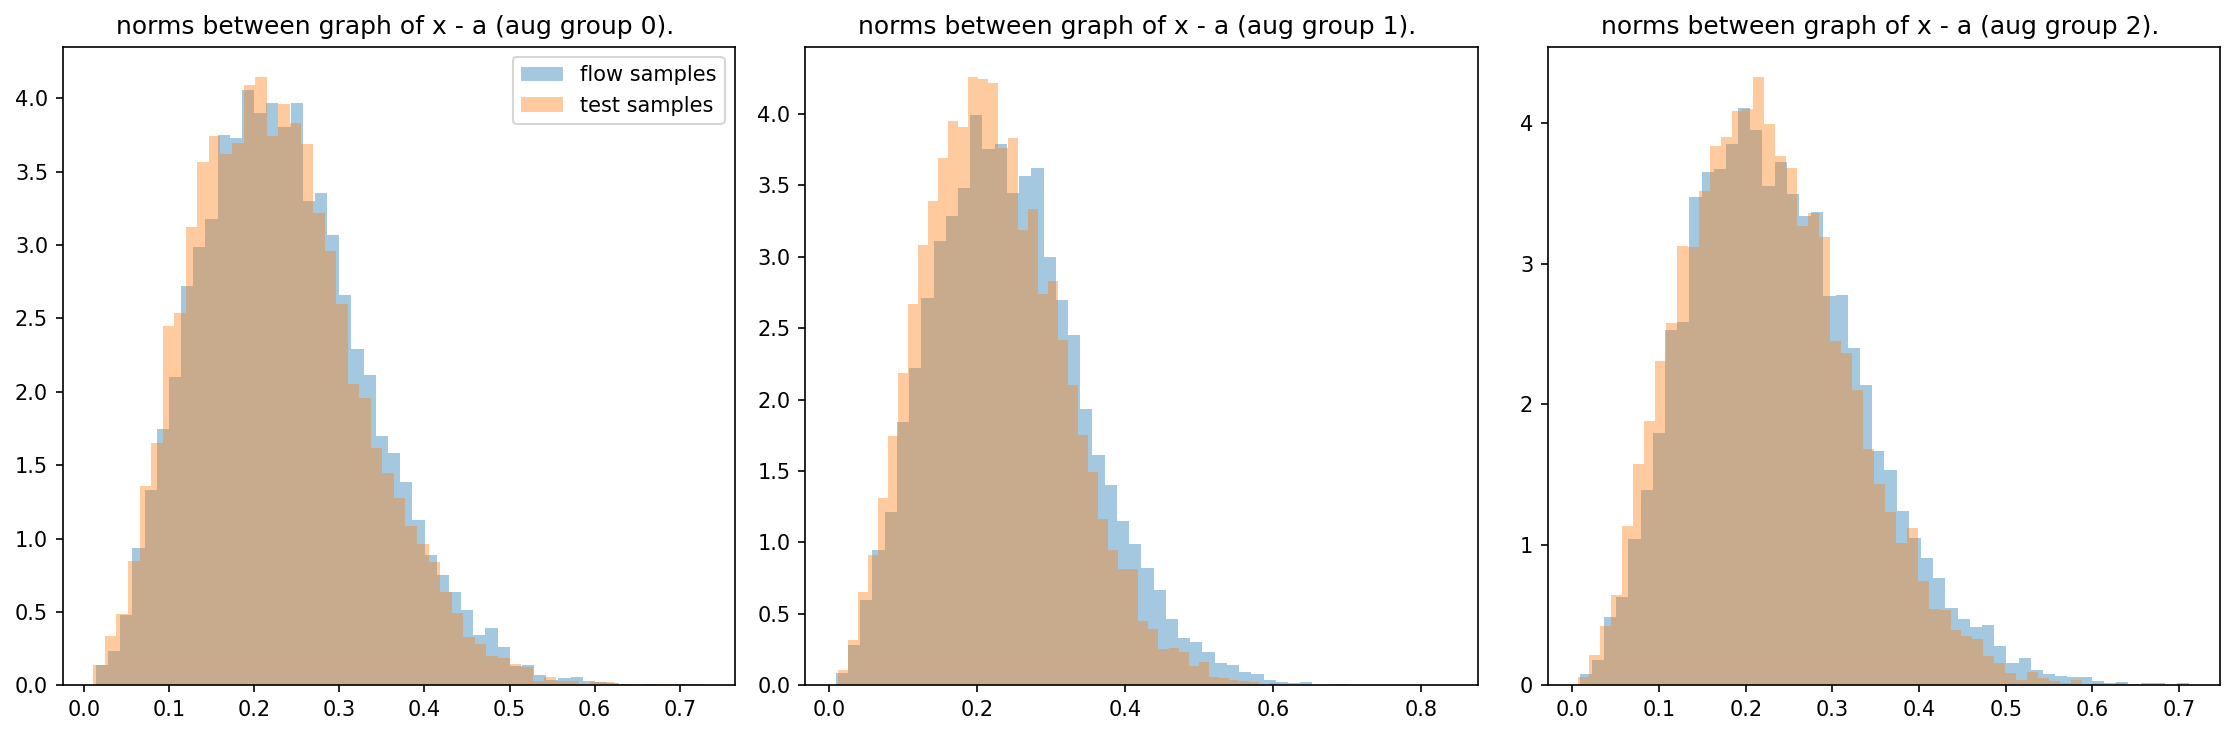

100%|█████████████████████████████████████████| 256/256 [12:10<00:00,  2.85s/it]


{'ess_marginal': Array(0.15661089, dtype=float32), 'eval_log_lik': Array(70.2527, dtype=float32), 'marginal_log_lik': Array(-30.208305, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00011038, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(3.5247493e-05, dtype=float32), 'var_log_w': Array(7.89011, dtype=float32)}


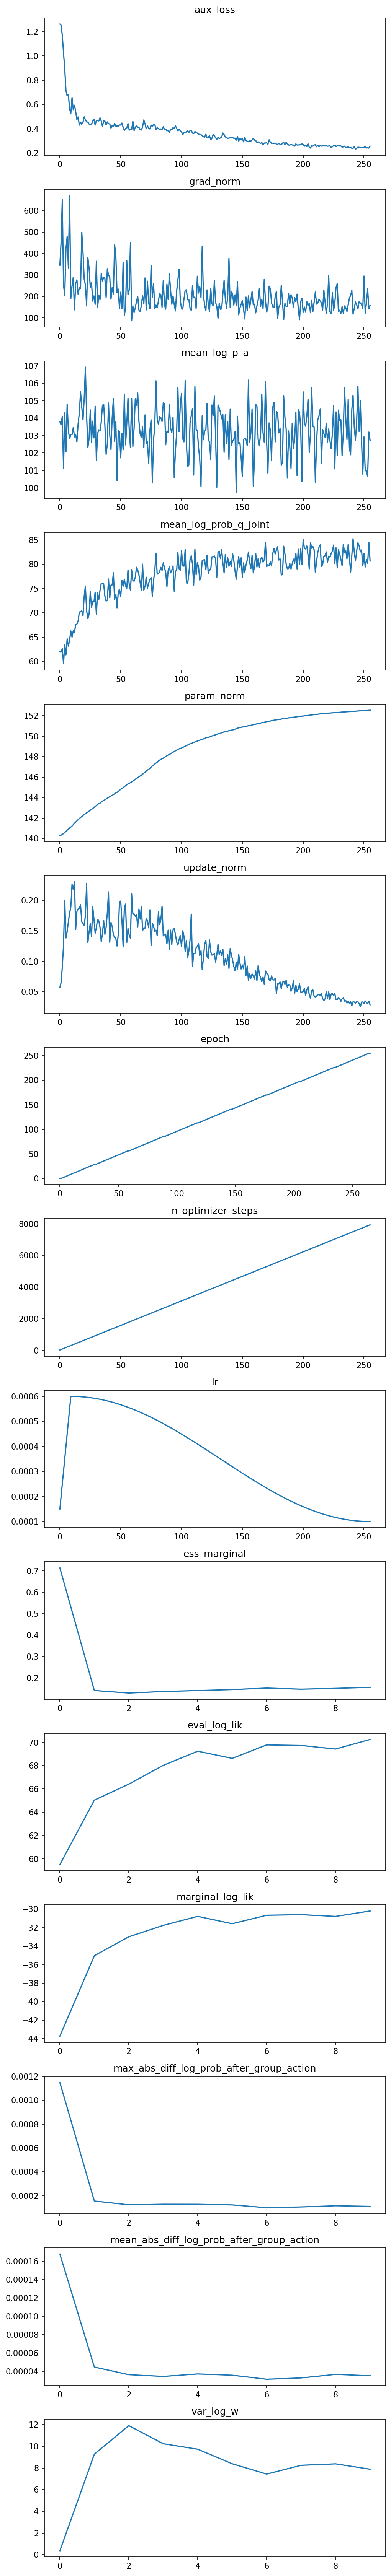

ValueError: not enough values to unpack (expected 4, got 3)

In [19]:
experiment_config = create_train_config(cfg, dim=dim, n_nodes=n_nodes,
                                        load_dataset=load_dataset)

logger, params, log_prob_fn, sample_and_log_prob_fn = train(experiment_config)

In [ ]:
train_data_original, test_data_original = load_dataset(cfg.training.batch_size, 
                                           1000, 
                                           1000)

In [ ]:
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
train_data = original_dataset_to_joint_dataset(train_data_original, subkey,
                                               global_centering=cfg.target.aug_global_centering,
                                               aug_scale=cfg.target.aug_scale)
key, subkey = jax.random.split(key)
test_data = original_dataset_to_joint_dataset(test_data_original, subkey,
                                              global_centering=cfg.target.aug_global_centering,
                                               aug_scale=cfg.target.aug_scale)

In [ ]:
plot_batch_size = 512
sample_fn = sample_fn = lambda params, key, shape: sample_and_log_prob_fn.apply(params, key, shape)[0]
default_plotter(params, sample_fn, key, plot_batch_size, train_data, test_data)

In [ ]:
eval_fn(params=params, x=test_data, flow_log_prob_fn=log_prob_fn,
                                flow_sample_and_log_prob_fn=sample_and_log_prob_fn,
                                target_log_prob=lj13.log_prob_fn,
                                key=jax.random.PRNGKey(1), 
        batch_size=cfg.training.batch_size,
        global_centering=cfg.target.aug_global_centering,
        aug_scale=cfg.target.aug_scale,
                                K=50)

# 